<a href="https://colab.research.google.com/github/Saimohan12/Ds-project/blob/main/heart%20disease27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Heart Disease Prediction Project - Snippet 1: Initial Setup and Data Loading
# -------------------------------------------------------------------------

# Import necessary libraries
!pip install ucimlrepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Set up visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Fetch the UCI Heart Disease dataset
print("Fetching Heart Disease dataset from UCI repository...")
heart_disease = fetch_ucirepo(id=45)

# Extract features and target
X = heart_disease.data.features
y = heart_disease.data.targets

# Display basic information about the dataset
print("\nDataset Metadata:")
print(heart_disease.metadata)
print("\nVariable Information:")
print(heart_disease.variables)

# Create a combined dataframe for easier handling
data = pd.concat([X, y], axis=1)
print("\nCombined DataFrame Shape:", data.shape)
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

print("\nDataset successfully loaded and initial check completed.")

Fetching Heart Disease dataset from UCI repository...

Dataset Metadata:
{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coron

Basic statistics of numerical features:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660   

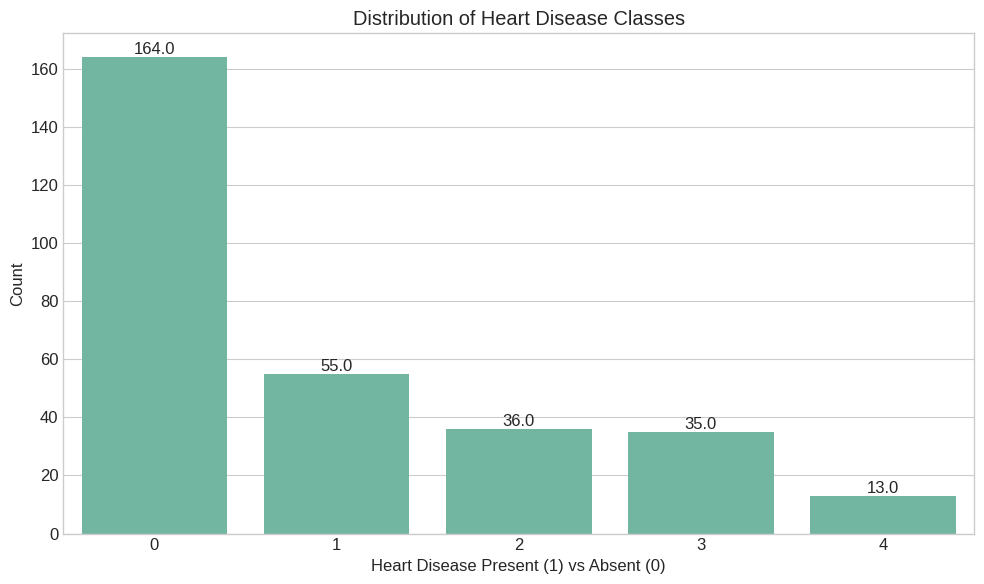


Number of duplicate rows: 0

Unique values for categorical columns:
sex: [1 0]
cp: [1 4 3 2]
fbs: [1 0]
restecg: [2 0 1]
exang: [0 1]
slope: [3 2 1]
ca: [ 0.  3.  2.  1. nan]
thal: [ 6.  3.  7. nan]

DataFrame after column renaming:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   63    1              1        145          233          1           2   
1   67    1              4        160          286          0           2   
2   67    1              4        120          229          0           2   
3   37    1              3        130          250          0           0   
4   41    0              2        130          204          0           2   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  MajorVessels  Thalassemia  \
0    150               0      2.3         3           0.0          6.0   
1    108               1      1.5         2           3.0          3.0   
2    129               1      2.6         2           2.0          7.0   
3    18

In [ ]:
# Heart Disease Prediction Project - Snippet 2: Dataset Structure and Basic EDA
# -------------------------------------------------------------------------

# Display basic statistics of the dataset
print("Basic statistics of numerical features:")
print(data.describe())

# Display information about data types and non-null values
print("\nDataset information:")
print(data.info())

# Check the distribution of the target variable
print("\nDistribution of target variable (Heart Disease):")
target_counts = data['num'].value_counts()
print(target_counts)

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='num', data=data)
plt.title('Distribution of Heart Disease Classes')
plt.xlabel('Heart Disease Present (1) vs Absent (0)')
plt.ylabel('Count')

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.savefig('target_distribution.png')
plt.show()

# Check for duplicate rows
duplicate_count = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Get the unique values for each categorical column
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
print("\nUnique values for categorical columns:")
for col in categorical_cols:
    print(f"{col}: {data[col].unique()}")

# Column renaming for better readability
column_mapping = {
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPainType',
    'trestbps': 'RestingBP',
    'chol': 'Cholesterol',
    'fbs': 'FastingBS',
    'restecg': 'RestingECG',
    'thalach': 'MaxHR',
    'exang': 'ExerciseAngina',
    'oldpeak': 'Oldpeak',
    'slope': 'ST_Slope',
    'ca': 'MajorVessels',
    'thal': 'Thalassemia',
    'num': 'HeartDisease'
}

data = data.rename(columns=column_mapping)
print("\nDataFrame after column renaming:")
print(data.head())

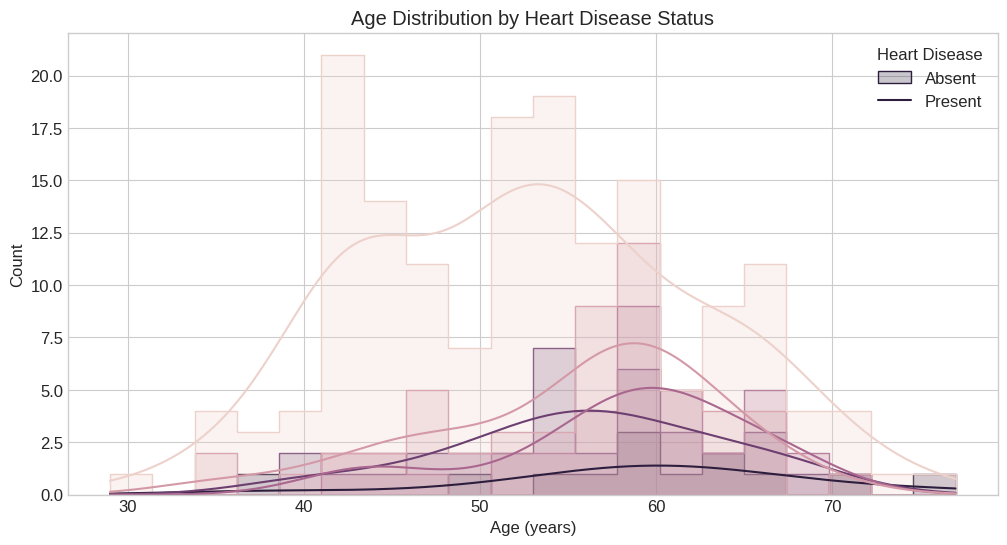

Age statistics by heart disease status:
              count       mean       std   min    25%   50%    75%   max
HeartDisease                                                            
0             164.0  52.585366  9.511957  29.0  44.75  52.0  59.00  76.0
1              55.0  55.381818  8.001136  35.0  50.50  57.0  60.50  70.0
2              36.0  58.027778  7.220946  42.0  55.75  59.0  62.25  69.0
3              35.0  56.000000  7.780065  39.0  51.50  56.0  62.00  70.0
4              13.0  59.692308  9.419701  38.0  57.00  60.0  64.00  77.0


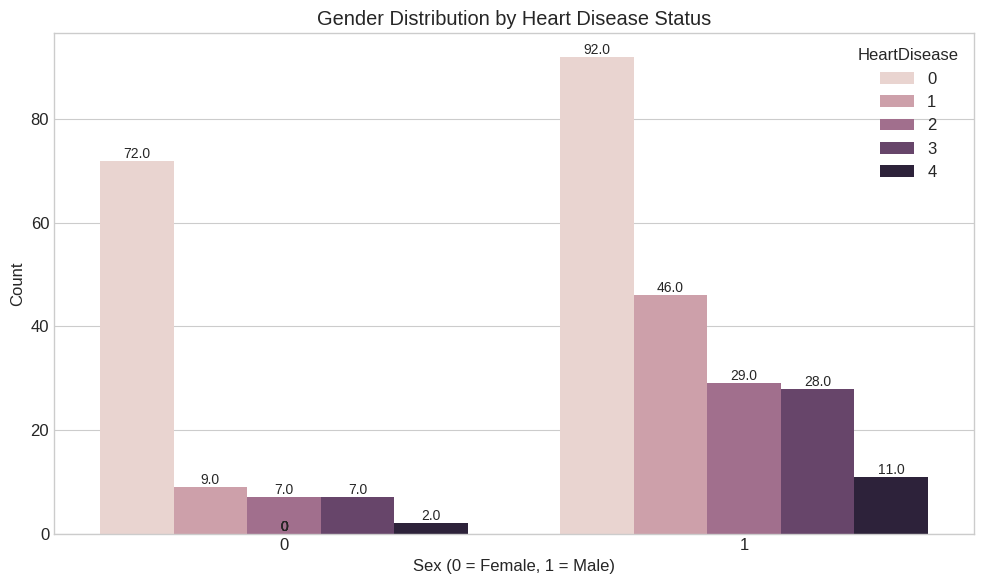


Percentage of heart disease by gender:
HeartDisease          0          1          2          3         4
Sex                                                               
0             74.226804   9.278351   7.216495   7.216495  2.061856
1             44.660194  22.330097  14.077670  13.592233  5.339806


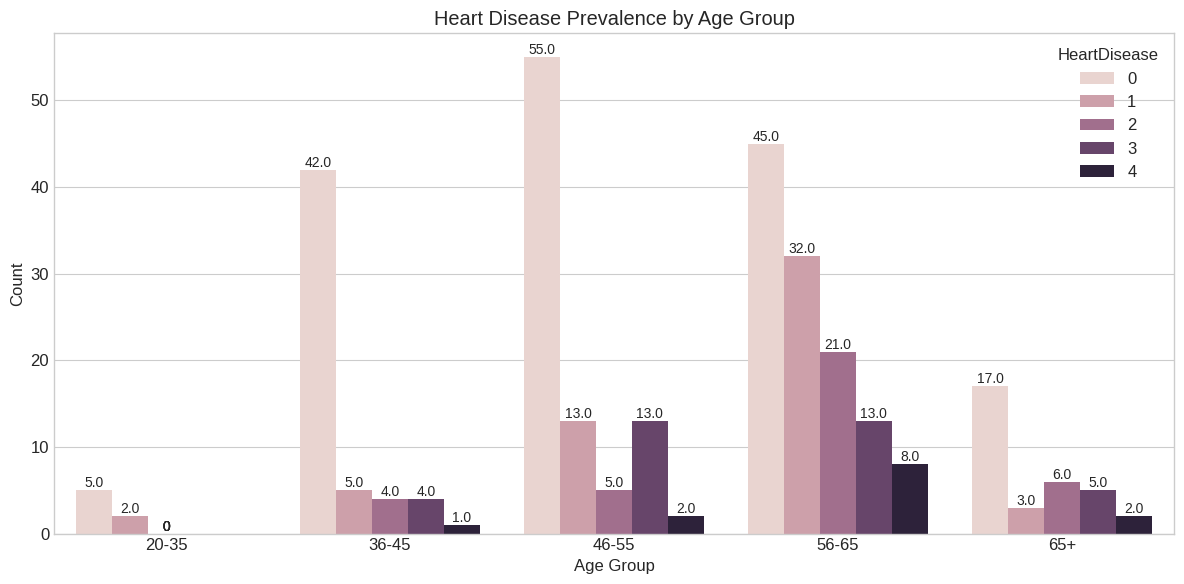


Percentage of heart disease by age group:
HeartDisease          0          1          2          3         4
AgeGroup                                                          
20-35         71.428571  28.571429   0.000000   0.000000  0.000000
36-45         75.000000   8.928571   7.142857   7.142857  1.785714
46-55         62.500000  14.772727   5.681818  14.772727  2.272727
56-65         37.815126  26.890756  17.647059  10.924370  6.722689
65+           51.515152   9.090909  18.181818  15.151515  6.060606


In [ ]:
# Heart Disease Prediction Project - Snippet 3: Demographic Features Analysis
# -------------------------------------------------------------------------

# Analyze age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Age', hue='HeartDisease', bins=20, kde=True, element='step')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.savefig('age_distribution.png')
plt.show()

# Age statistics by heart disease status
print("Age statistics by heart disease status:")
print(data.groupby('HeartDisease')['Age'].describe())

# Gender distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Sex', hue='HeartDisease', data=data)
plt.title('Gender Distribution by Heart Disease Status')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')

# Add count labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('gender_distribution.png')
plt.show()

# Calculate gender proportions
gender_heart_disease = pd.crosstab(data['Sex'], data['HeartDisease'], normalize='index') * 100
print("\nPercentage of heart disease by gender:")
print(gender_heart_disease)

# Create an age group categorical variable
data['AgeGroup'] = pd.cut(data['Age'], bins=[20, 35, 45, 55, 65, 100],
                         labels=['20-35', '36-45', '46-55', '56-65', '65+'])

# Analyze heart disease prevalence by age group
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='AgeGroup', hue='HeartDisease', data=data)
plt.title('Heart Disease Prevalence by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('age_group_distribution.png')
plt.show()

# Calculate percentage of heart disease by age group
age_heart_disease = pd.crosstab(data['AgeGroup'], data['HeartDisease'], normalize='index') * 100
print("\nPercentage of heart disease by age group:")
print(age_heart_disease)

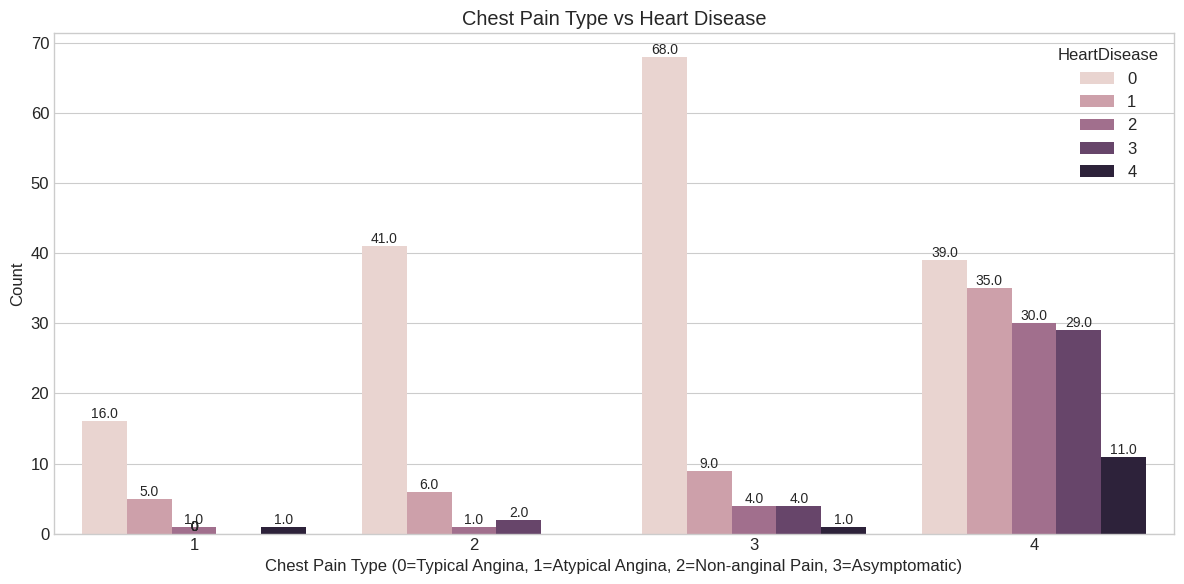


Percentage of heart disease by chest pain type:
HeartDisease           0          1          2          3         4
ChestPainType                                                      
1              69.565217  21.739130   4.347826   0.000000  4.347826
2              82.000000  12.000000   2.000000   4.000000  0.000000
3              79.069767  10.465116   4.651163   4.651163  1.162791
4              27.083333  24.305556  20.833333  20.138889  7.638889


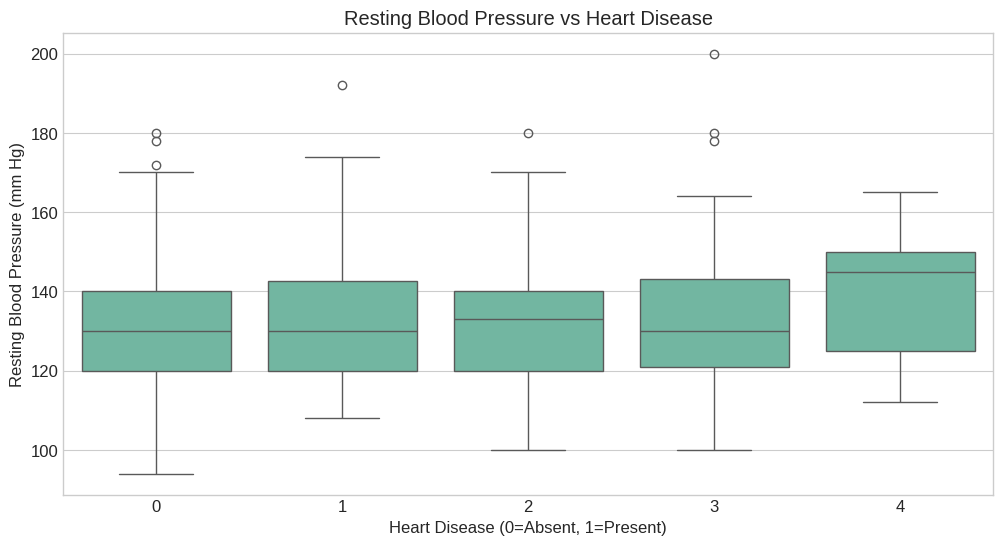


Resting BP statistics by heart disease status:
              count        mean        std    min    25%    50%    75%    max
HeartDisease                                                                 
0             164.0  129.250000  16.204739   94.0  120.0  130.0  140.0  180.0
1              55.0  133.254545  18.027980  108.0  120.0  130.0  142.5  192.0
2              36.0  134.194444  17.896240  100.0  120.0  133.0  140.0  180.0
3              35.0  135.457143  21.660947  100.0  121.0  130.0  143.0  200.0
4              13.0  138.769231  17.186011  112.0  125.0  145.0  150.0  165.0


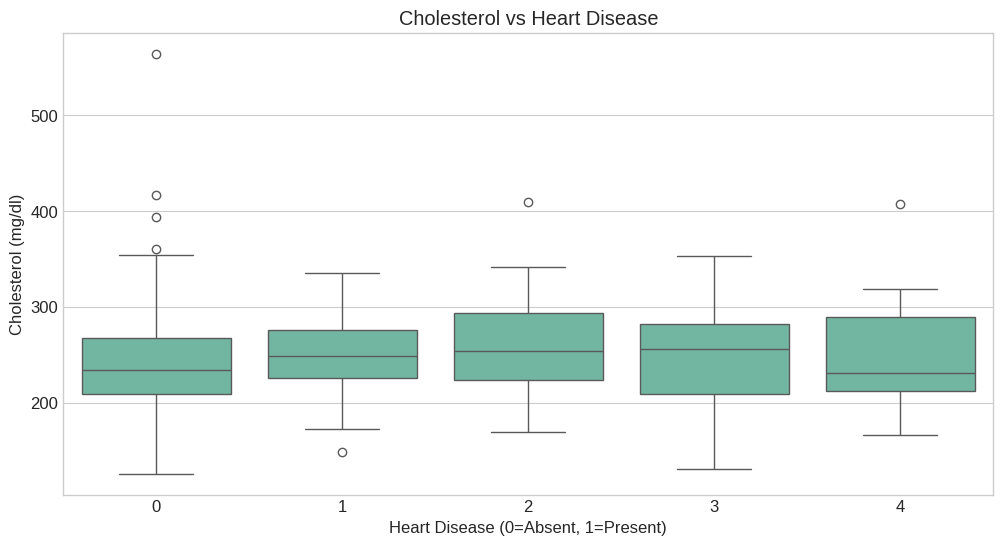


Cholesterol statistics by heart disease status:
              count        mean        std    min     25%    50%     75%  \
HeartDisease                                                               
0             164.0  242.640244  53.456580  126.0  208.75  234.5  267.25   
1              55.0  249.109091  40.751129  149.0  226.00  249.0  275.50   
2              36.0  259.277778  53.745225  169.0  223.25  254.0  293.25   
3              35.0  246.457143  51.741065  131.0  209.00  256.0  281.50   
4              13.0  253.384615  66.287931  166.0  212.00  231.0  289.00   

                max  
HeartDisease         
0             564.0  
1             335.0  
2             409.0  
3             353.0  
4             407.0  


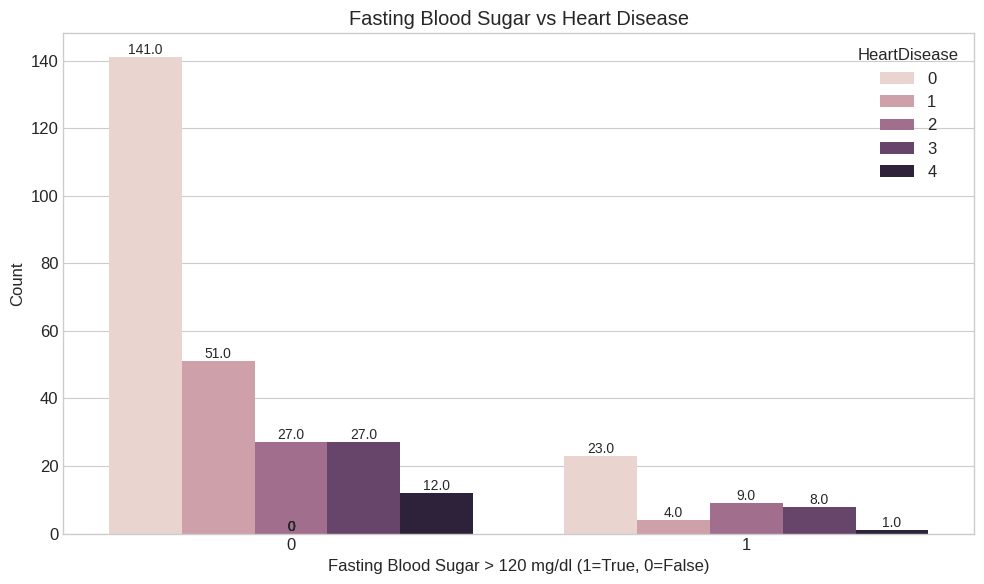


Percentage of heart disease by fasting blood sugar status:
HeartDisease          0          1          2          3         4
FastingBS                                                         
0             54.651163  19.767442  10.465116  10.465116  4.651163
1             51.111111   8.888889  20.000000  17.777778  2.222222


In [ ]:
# Heart Disease Prediction Project - Snippet 4: Clinical Features Analysis
# -------------------------------------------------------------------------

# Chest Pain Type Analysis
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='ChestPainType', hue='HeartDisease', data=data)
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type (0=Typical Angina, 1=Atypical Angina, 2=Non-anginal Pain, 3=Asymptomatic)')
plt.ylabel('Count')

# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('chest_pain_distribution.png')
plt.show()

# Calculate percentage of heart disease by chest pain type
cp_heart_disease = pd.crosstab(data['ChestPainType'], data['HeartDisease'], normalize='index') * 100
print("\nPercentage of heart disease by chest pain type:")
print(cp_heart_disease)

# Resting Blood Pressure Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='HeartDisease', y='RestingBP', data=data)
plt.title('Resting Blood Pressure vs Heart Disease')
plt.xlabel('Heart Disease (0=Absent, 1=Present)')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.savefig('bp_vs_heartdisease.png')
plt.show()

print("\nResting BP statistics by heart disease status:")
print(data.groupby('HeartDisease')['RestingBP'].describe())

# Cholesterol Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='HeartDisease', y='Cholesterol', data=data)
plt.title('Cholesterol vs Heart Disease')
plt.xlabel('Heart Disease (0=Absent, 1=Present)')
plt.ylabel('Cholesterol (mg/dl)')
plt.savefig('cholesterol_vs_heartdisease.png')
plt.show()

print("\nCholesterol statistics by heart disease status:")
print(data.groupby('HeartDisease')['Cholesterol'].describe())

# Fasting Blood Sugar Analysis
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='FastingBS', hue='HeartDisease', data=data)
plt.title('Fasting Blood Sugar vs Heart Disease')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1=True, 0=False)')
plt.ylabel('Count')

# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('fbs_vs_heartdisease.png')
plt.show()

# Calculate percentage of heart disease by fasting blood sugar status
fbs_heart_disease = pd.crosstab(data['FastingBS'], data['HeartDisease'], normalize='index') * 100
print("\nPercentage of heart disease by fasting blood sugar status:")
print(fbs_heart_disease)

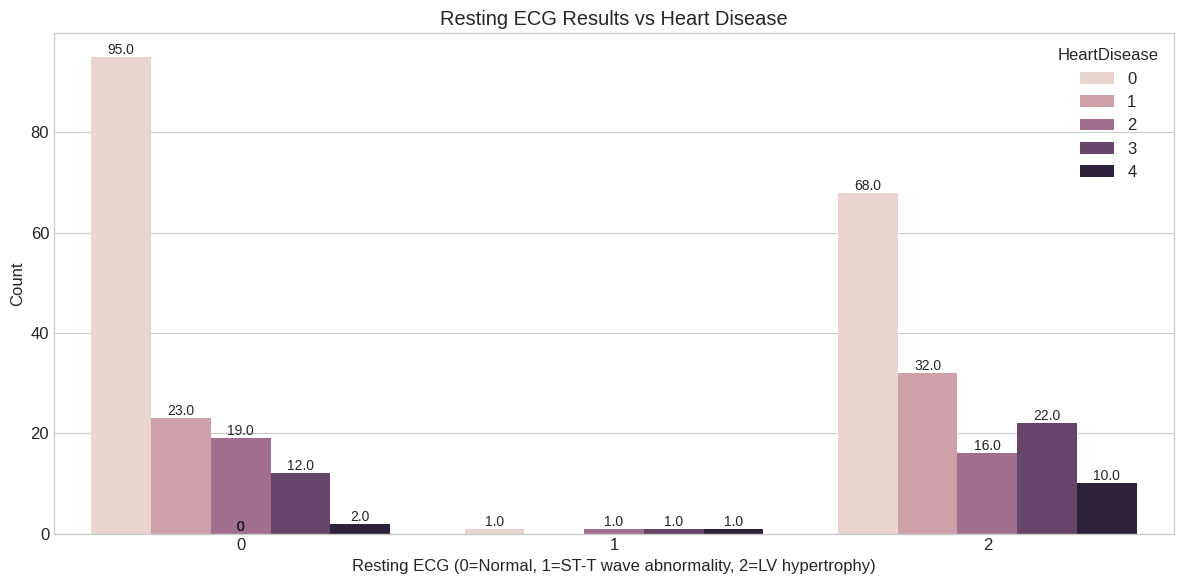


Percentage of heart disease by resting ECG result:
HeartDisease          0          1          2          3          4
RestingECG                                                         
0             62.913907  15.231788  12.582781   7.947020   1.324503
1             25.000000   0.000000  25.000000  25.000000  25.000000
2             45.945946  21.621622  10.810811  14.864865   6.756757


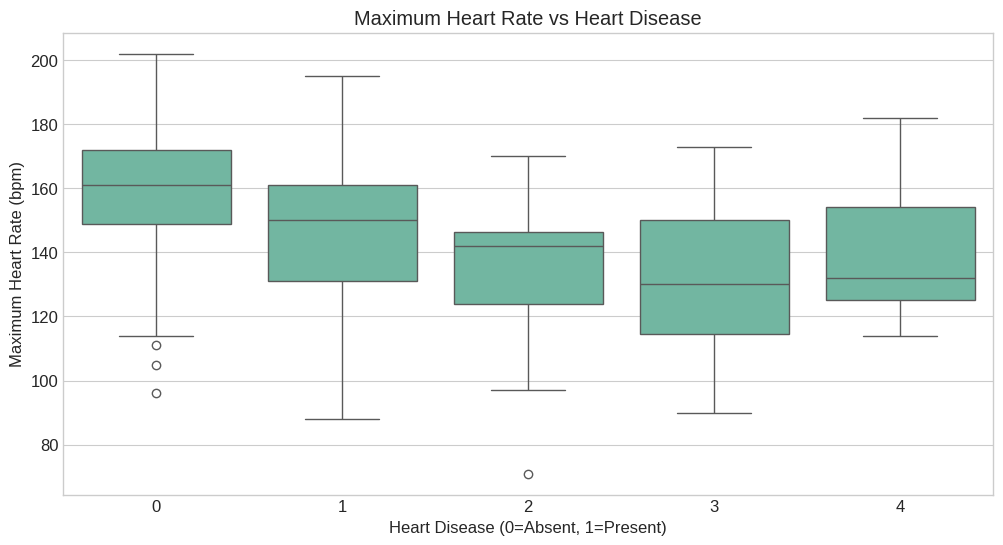


Maximum Heart Rate statistics by heart disease status:
              count        mean        std    min     25%    50%     75%  \
HeartDisease                                                               
0             164.0  158.378049  19.199080   96.0  148.75  161.0  172.00   
1              55.0  145.927273  22.842338   88.0  131.00  150.0  161.00   
2              36.0  135.583333  20.863331   71.0  123.75  142.0  146.25   
3              35.0  132.057143  22.698721   90.0  114.50  130.0  150.00   
4              13.0  140.615385  19.881057  114.0  125.00  132.0  154.00   

                max  
HeartDisease         
0             202.0  
1             195.0  
2             170.0  
3             173.0  
4             182.0  


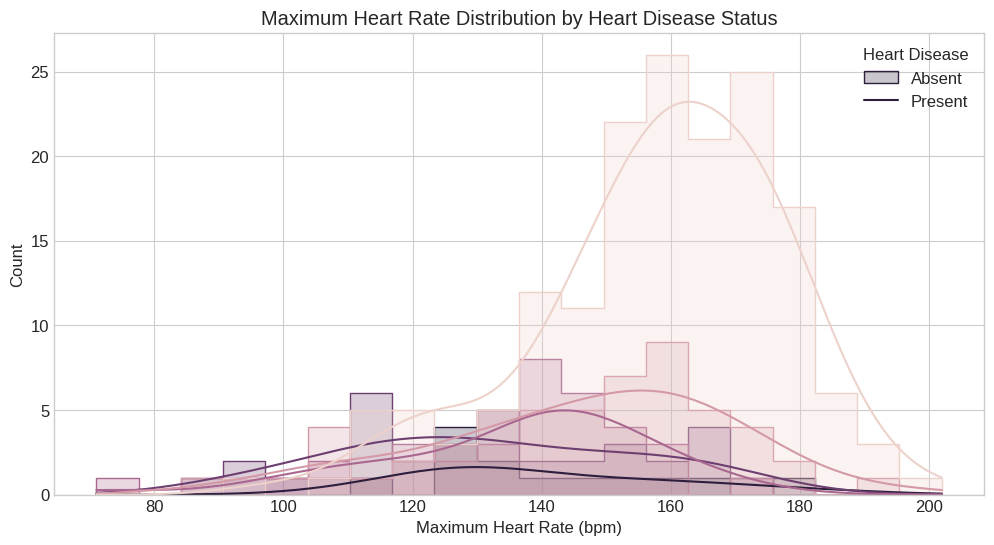

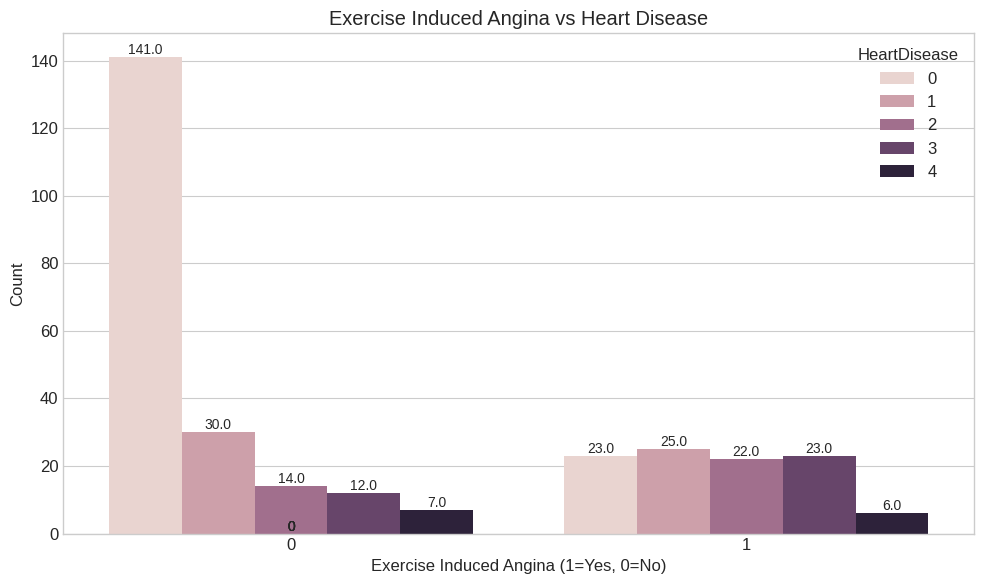


Percentage of heart disease by exercise induced angina status:
HeartDisease            0          1          2          3         4
ExerciseAngina                                                      
0               69.117647  14.705882   6.862745   5.882353  3.431373
1               23.232323  25.252525  22.222222  23.232323  6.060606


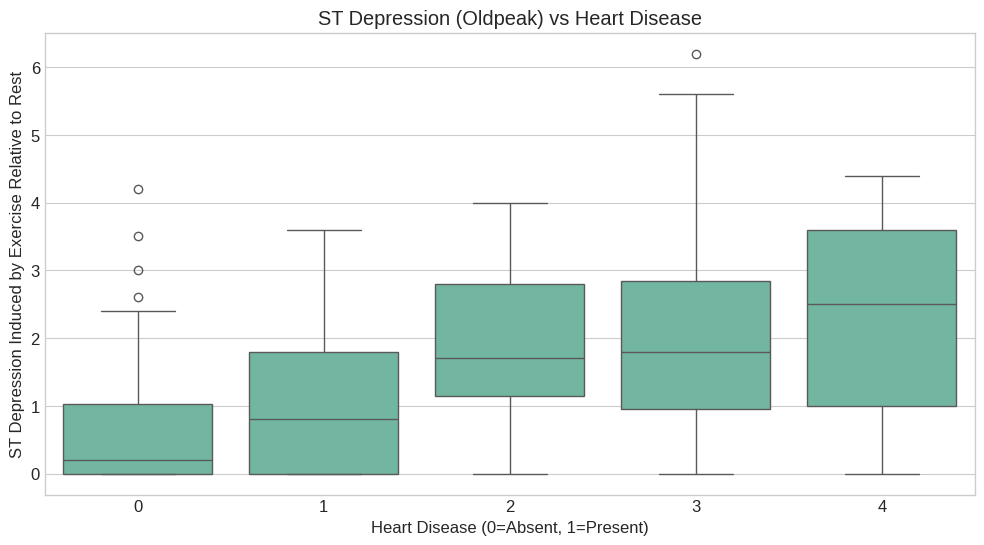


ST Depression statistics by heart disease status:
              count      mean       std  min   25%  50%    75%  max
HeartDisease                                                       
0             164.0  0.586585  0.781734  0.0  0.00  0.2  1.025  4.2
1              55.0  1.005455  0.993389  0.0  0.00  0.8  1.800  3.6
2              36.0  1.780556  1.158773  0.0  1.15  1.7  2.800  4.0
3              35.0  1.962857  1.522012  0.0  0.95  1.8  2.850  6.2
4              13.0  2.361538  1.367198  0.0  1.00  2.5  3.600  4.4


In [ ]:
# Heart Disease Prediction Project - Snippet 5: ECG and Exercise Features Analysis
# -------------------------------------------------------------------------

# Resting ECG Analysis
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='RestingECG', hue='HeartDisease', data=data)
plt.title('Resting ECG Results vs Heart Disease')
plt.xlabel('Resting ECG (0=Normal, 1=ST-T wave abnormality, 2=LV hypertrophy)')
plt.ylabel('Count')

# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('restecg_vs_heartdisease.png')
plt.show()

# Calculate percentage of heart disease by resting ECG result
restecg_heart_disease = pd.crosstab(data['RestingECG'], data['HeartDisease'], normalize='index') * 100
print("\nPercentage of heart disease by resting ECG result:")
print(restecg_heart_disease)

# Maximum Heart Rate Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='HeartDisease', y='MaxHR', data=data)
plt.title('Maximum Heart Rate vs Heart Disease')
plt.xlabel('Heart Disease (0=Absent, 1=Present)')
plt.ylabel('Maximum Heart Rate (bpm)')
plt.savefig('maxhr_vs_heartdisease.png')
plt.show()

print("\nMaximum Heart Rate statistics by heart disease status:")
print(data.groupby('HeartDisease')['MaxHR'].describe())

# Distribution of Max HR
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='MaxHR', hue='HeartDisease', bins=20, kde=True, element='step')
plt.title('Maximum Heart Rate Distribution by Heart Disease Status')
plt.xlabel('Maximum Heart Rate (bpm)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.savefig('maxhr_distribution.png')
plt.show()

# Exercise Induced Angina Analysis
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=data)
plt.title('Exercise Induced Angina vs Heart Disease')
plt.xlabel('Exercise Induced Angina (1=Yes, 0=No)')
plt.ylabel('Count')

# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('exang_vs_heartdisease.png')
plt.show()

# Calculate percentage of heart disease by exercise induced angina status
exang_heart_disease = pd.crosstab(data['ExerciseAngina'], data['HeartDisease'], normalize='index') * 100
print("\nPercentage of heart disease by exercise induced angina status:")
print(exang_heart_disease)

# ST Depression (Oldpeak) Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='HeartDisease', y='Oldpeak', data=data)
plt.title('ST Depression (Oldpeak) vs Heart Disease')
plt.xlabel('Heart Disease (0=Absent, 1=Present)')
plt.ylabel('ST Depression Induced by Exercise Relative to Rest')
plt.savefig('oldpeak_vs_heartdisease.png')
plt.show()

print("\nST Depression statistics by heart disease status:")
print(data.groupby('HeartDisease')['Oldpeak'].describe())

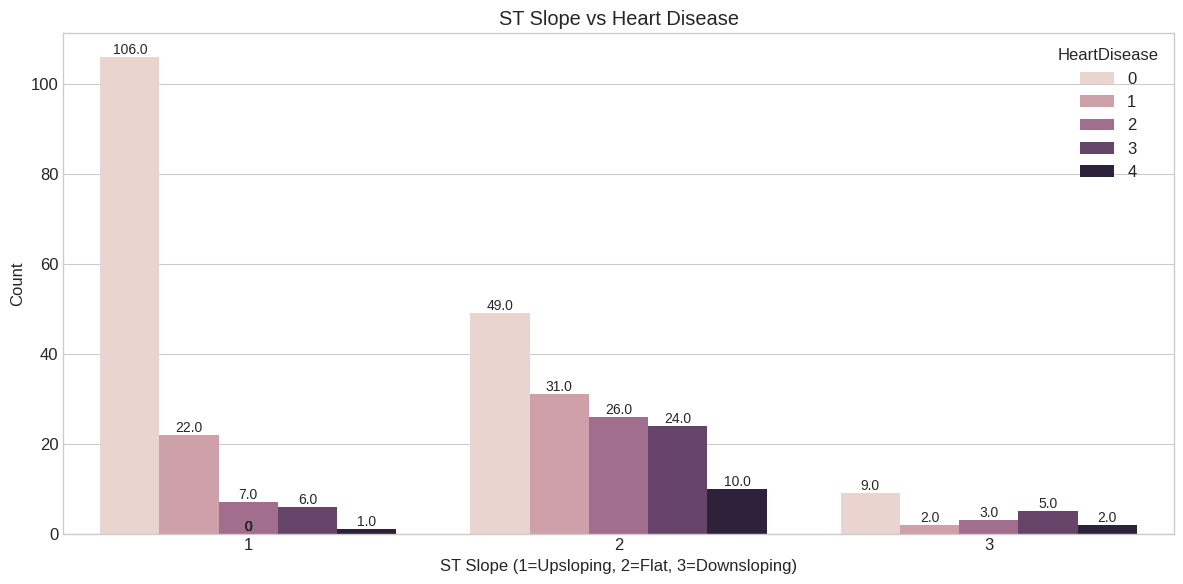


Percentage of heart disease by ST slope:
HeartDisease          0          1          2          3         4
ST_Slope                                                          
1             74.647887  15.492958   4.929577   4.225352  0.704225
2             35.000000  22.142857  18.571429  17.142857  7.142857
3             42.857143   9.523810  14.285714  23.809524  9.523810


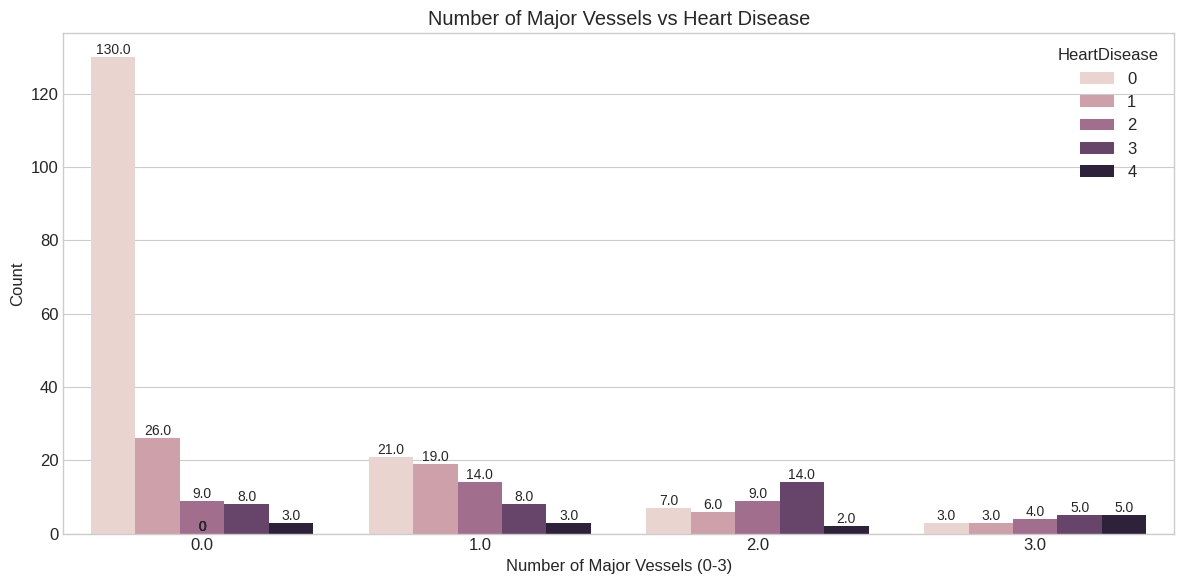


Percentage of heart disease by number of major vessels:
HeartDisease          0          1          2          3          4
MajorVessels                                                       
0.0           73.863636  14.772727   5.113636   4.545455   1.704545
1.0           32.307692  29.230769  21.538462  12.307692   4.615385
2.0           18.421053  15.789474  23.684211  36.842105   5.263158
3.0           15.000000  15.000000  20.000000  25.000000  25.000000


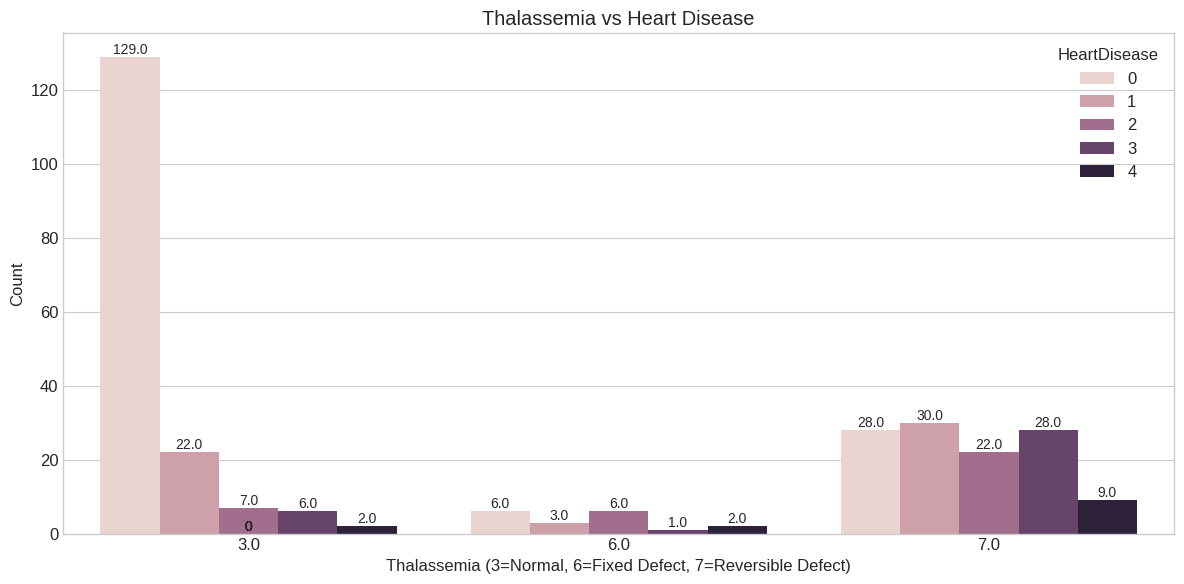


Percentage of heart disease by thalassemia type:
HeartDisease          0          1          2          3          4
Thalassemia                                                        
3.0           77.710843  13.253012   4.216867   3.614458   1.204819
6.0           33.333333  16.666667  33.333333   5.555556  11.111111
7.0           23.931624  25.641026  18.803419  23.931624   7.692308

Unique values in MajorVessels column: [ 0.  3.  2.  1. nan]
Unique values in Thalassemia column: [ 6.  3.  7. nan]


In [ ]:
# Heart Disease Prediction Project - Snippet 6: Additional Clinical Features Analysis
# -------------------------------------------------------------------------

# ST Slope Analysis
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='ST_Slope', hue='HeartDisease', data=data)
plt.title('ST Slope vs Heart Disease')
plt.xlabel('ST Slope (1=Upsloping, 2=Flat, 3=Downsloping)')
plt.ylabel('Count')

# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('slope_vs_heartdisease.png')
plt.show()

# Calculate percentage of heart disease by ST slope
slope_heart_disease = pd.crosstab(data['ST_Slope'], data['HeartDisease'], normalize='index') * 100
print("\nPercentage of heart disease by ST slope:")
print(slope_heart_disease)

# Number of Major Vessels Analysis
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='MajorVessels', hue='HeartDisease', data=data)
plt.title('Number of Major Vessels vs Heart Disease')
plt.xlabel('Number of Major Vessels (0-3)')
plt.ylabel('Count')

# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('ca_vs_heartdisease.png')
plt.show()

# Calculate percentage of heart disease by number of major vessels
ca_heart_disease = pd.crosstab(data['MajorVessels'], data['HeartDisease'], normalize='index') * 100
print("\nPercentage of heart disease by number of major vessels:")
print(ca_heart_disease)

# Thalassemia Analysis
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Thalassemia', hue='HeartDisease', data=data)
plt.title('Thalassemia vs Heart Disease')
plt.xlabel('Thalassemia (3=Normal, 6=Fixed Defect, 7=Reversible Defect)')
plt.ylabel('Count')

# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('thal_vs_heartdisease.png')
plt.show()

# Calculate percentage of heart disease by thalassemia type
thal_heart_disease = pd.crosstab(data['Thalassemia'], data['HeartDisease'], normalize='index') * 100
print("\nPercentage of heart disease by thalassemia type:")
print(thal_heart_disease)

# Check for unique values in MajorVessels and Thalassemia (sometimes these have missing values)
print("\nUnique values in MajorVessels column:", data['MajorVessels'].unique())
print("Unique values in Thalassemia column:", data['Thalassemia'].unique())

# Check if there are any values like '?' that need to be handled
for col in ['MajorVessels', 'Thalassemia']:
    if '?' in data[col].values:
        print(f"Column {col} contains '?' values that need to be handled.")

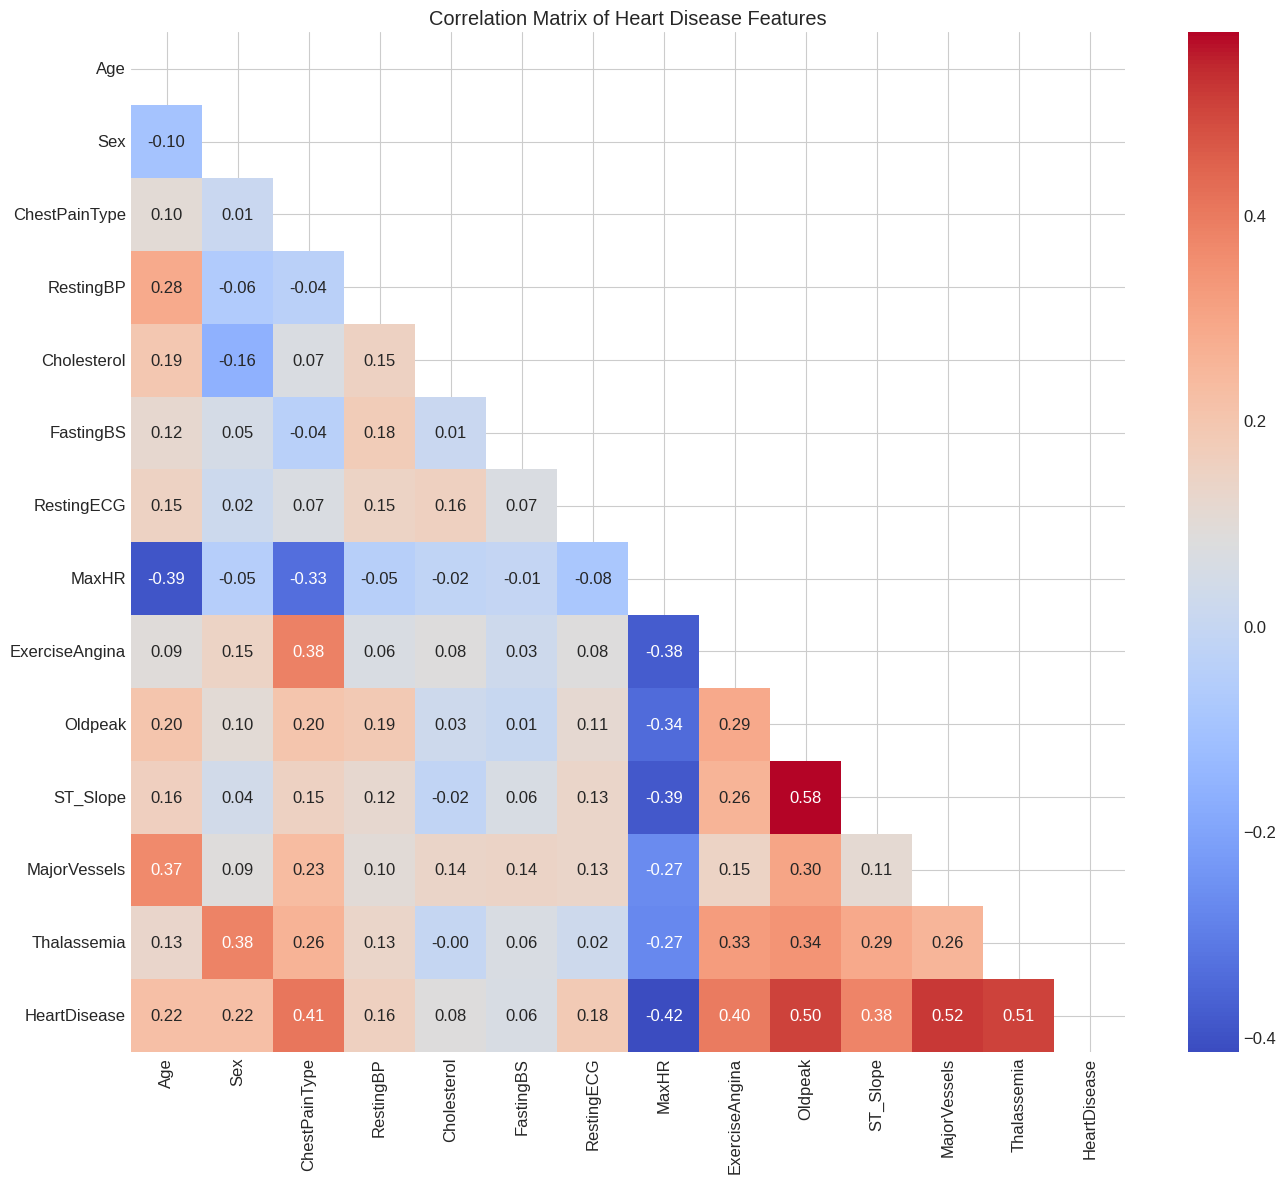


Correlation of features with Heart Disease:
HeartDisease      1.000000
MajorVessels      0.520968
Thalassemia       0.507155
Oldpeak           0.504092
ChestPainType     0.407075
ExerciseAngina    0.397057
ST_Slope          0.377957
Sex               0.224469
Age               0.222853
RestingECG        0.183696
RestingBP         0.157754
Cholesterol       0.083859
FastingBS         0.059186
MaxHR            -0.415040
Name: HeartDisease, dtype: float64


<ipython-input-34-f99f37e59593>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_correlations.values, y=top_correlations.index, palette='viridis')


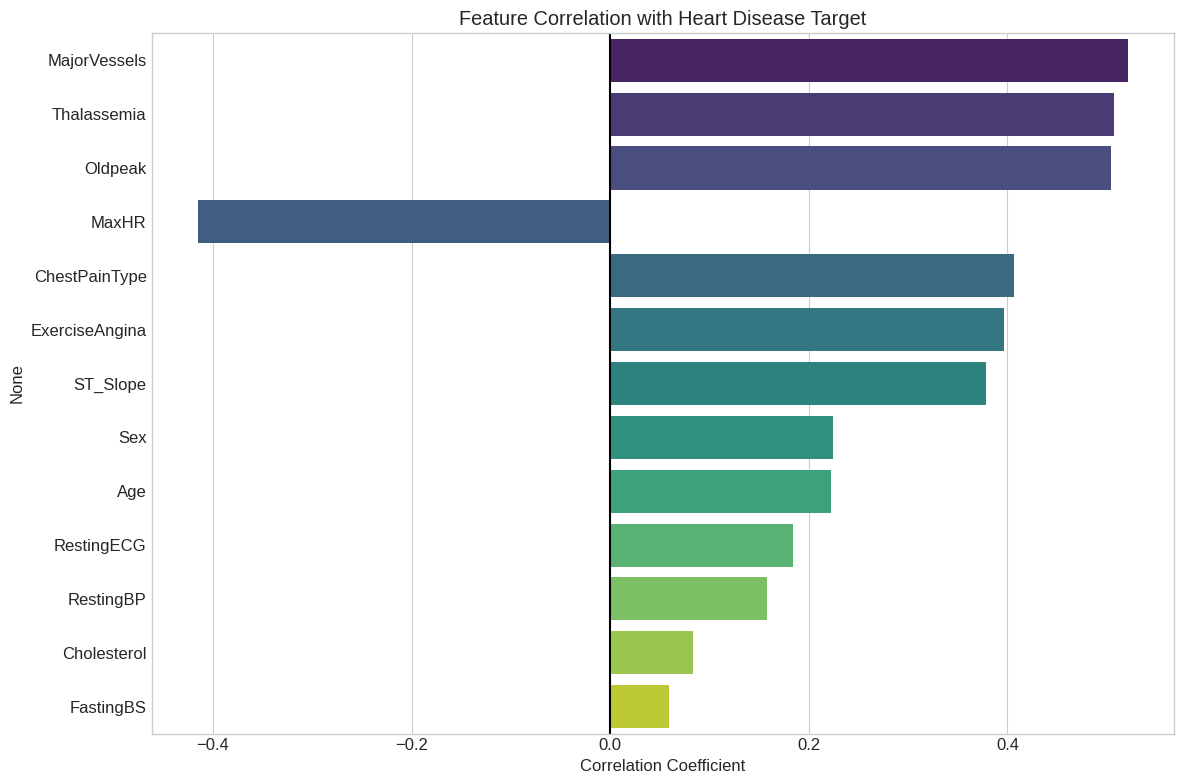

<Figure size 2000x1500 with 0 Axes>

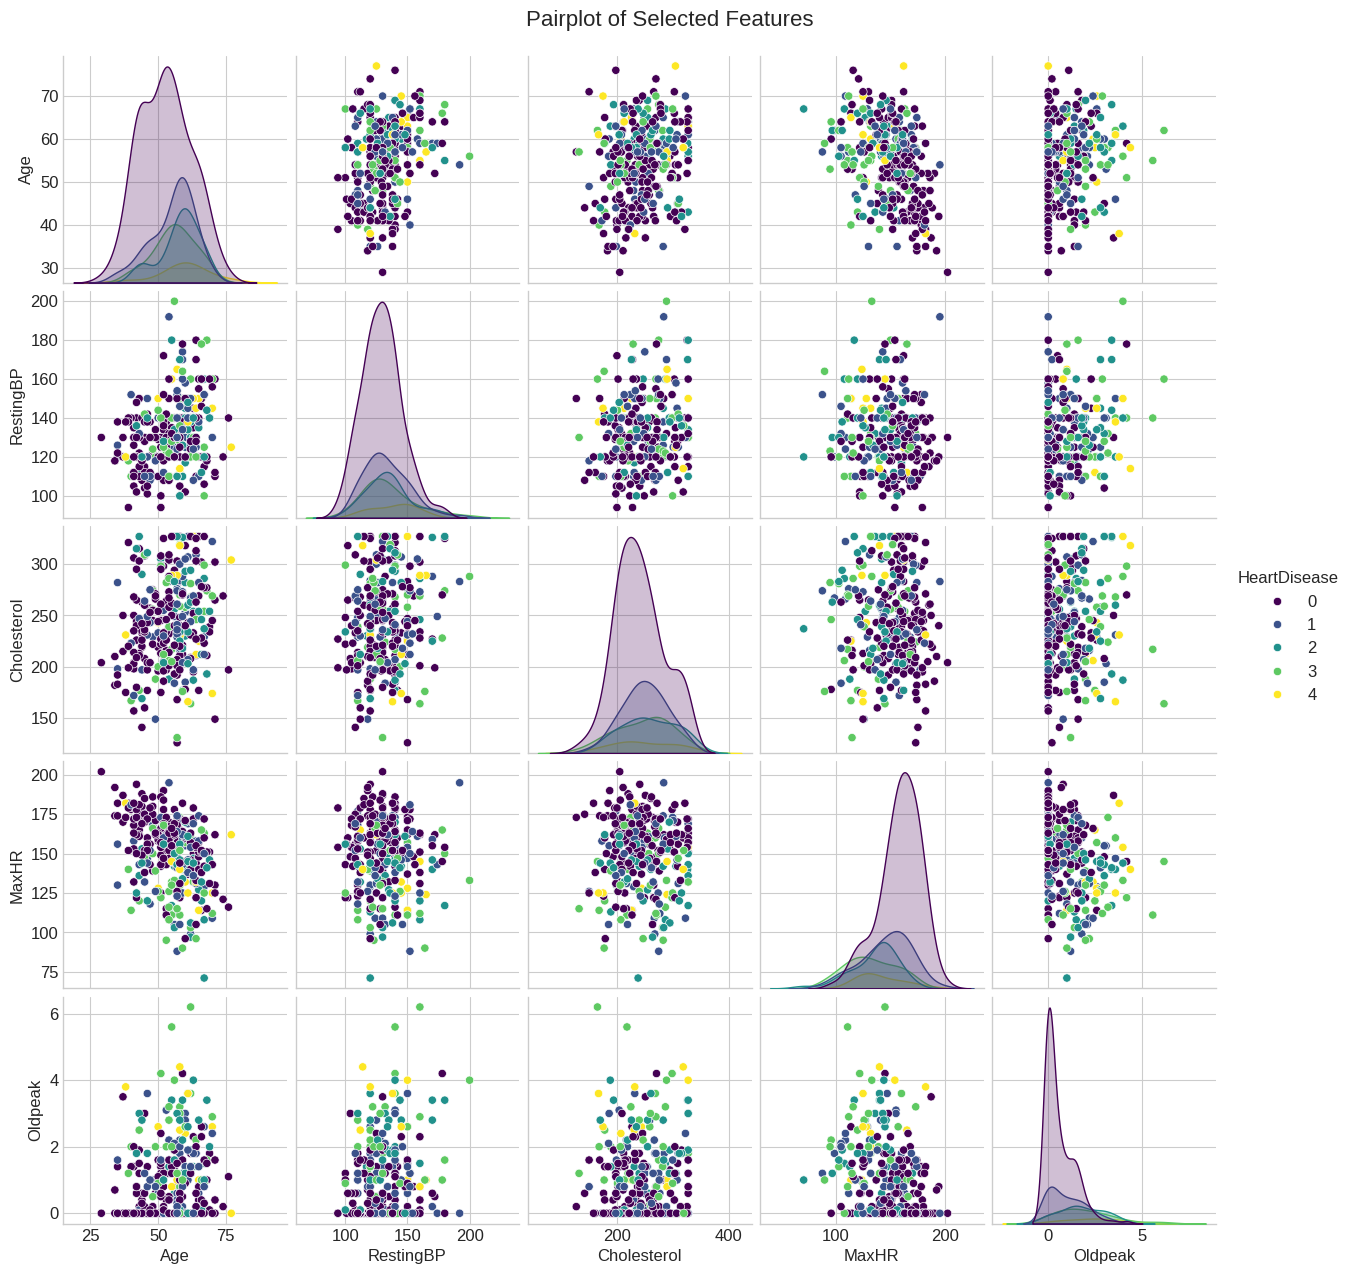

In [ ]:
# Heart Disease Prediction Project - Snippet 7: Correlation Analysis
# -------------------------------------------------------------------------

# Convert categorical columns to numeric if they aren't already
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG',
                    'ExerciseAngina', 'ST_Slope', 'MajorVessels', 'Thalassemia']

# First, ensure all categorical columns are properly converted to numeric
for col in categorical_cols:
    # Replace '?' with NaN if present
    if '?' in data[col].values:
        data[col] = data[col].replace('?', np.nan)

    # Convert to numeric
    data[col] = pd.to_numeric(data[col], errors='coerce')

# --- Exclude the 'AgeGroup' column from correlation analysis ---
numerical_data = data.drop(columns=['AgeGroup'])  # Exclude AgeGroup

# Compute the correlation matrix on numerical data only
correlation_matrix = numerical_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Correlation Matrix of Heart Disease Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

# Display the correlation with the target variable
target_correlation = correlation_matrix['HeartDisease'].sort_values(ascending=False)
print("\nCorrelation of features with Heart Disease:")
print(target_correlation)

# Visualize the top correlations with the target
plt.figure(figsize=(12, 8))
top_correlations = target_correlation.drop('HeartDisease')
top_correlations = top_correlations.reindex(top_correlations.abs().sort_values(ascending=False).index)

# Plot horizontal bar chart of correlations
sns.barplot(x=top_correlations.values, y=top_correlations.index, palette='viridis')
plt.title('Feature Correlation with Heart Disease Target')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='-')
plt.tight_layout()
plt.savefig('target_correlations.png')
plt.show()

# Pairplot of selected numerical features
selected_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
plt.figure(figsize=(20, 15))
sns.pairplot(data[selected_features], hue='HeartDisease', palette='viridis')
plt.suptitle('Pairplot of Selected Features', y=1.02, fontsize=16)
plt.savefig('pairplot.png')
plt.show()

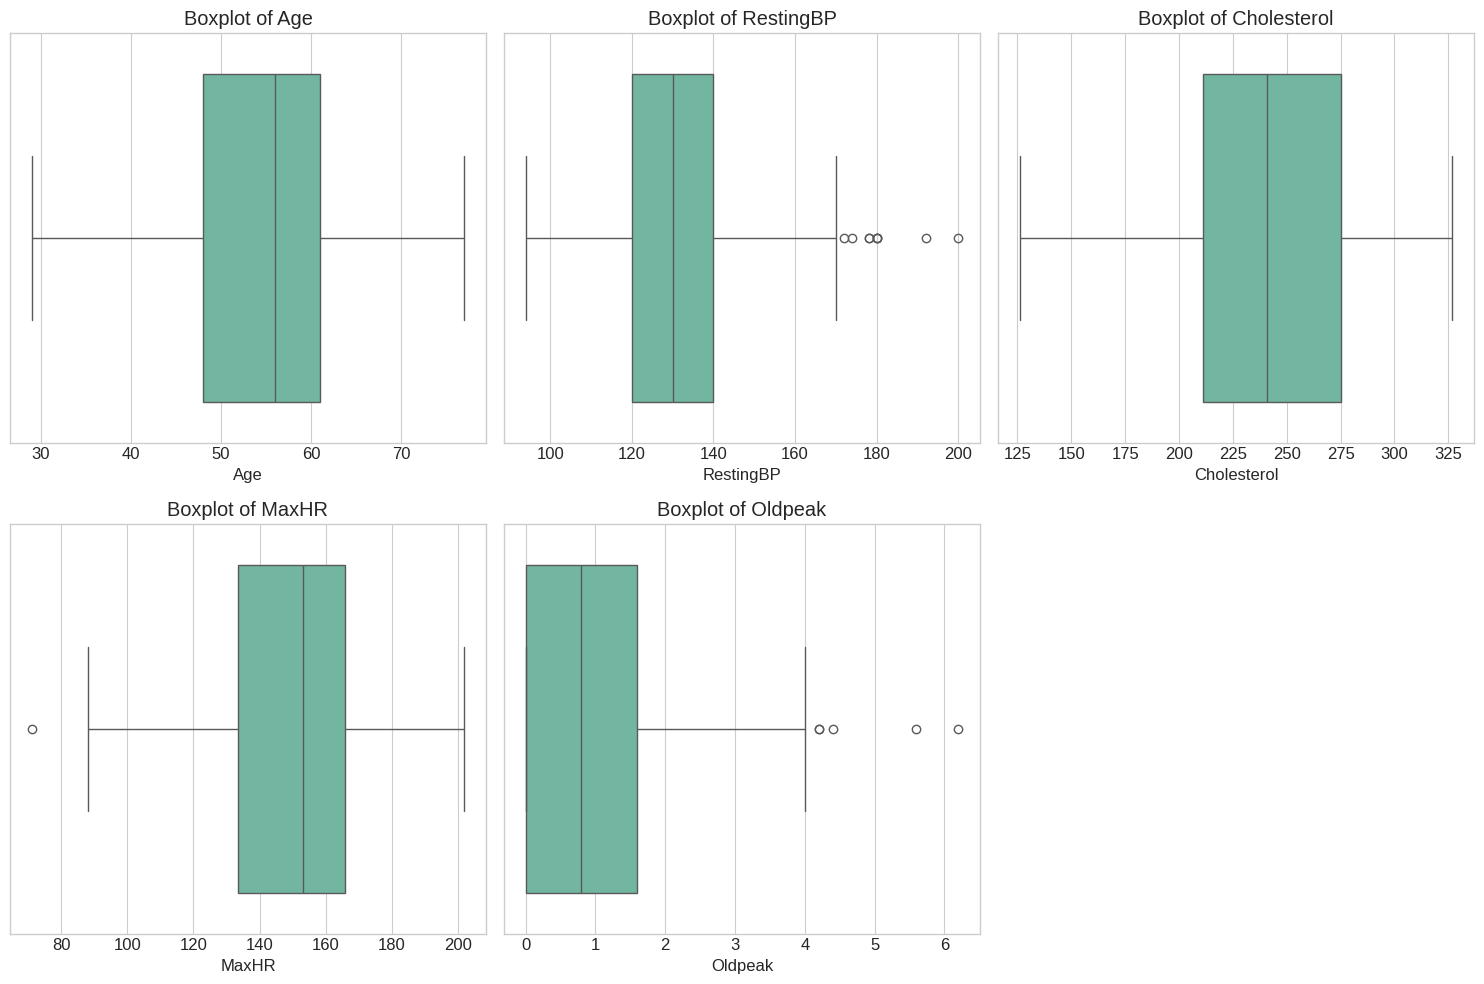


Outlier Analysis using IQR method:
Age: 0 outliers identified
    Lower bound: 28.50, Upper bound: 80.50
    Min: 29.00, Max: 77.00


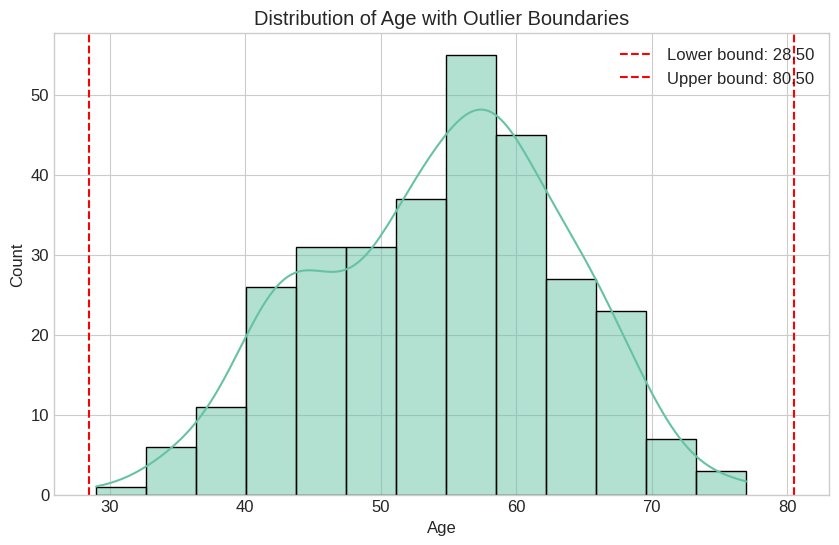

RestingBP: 9 outliers identified
    Lower bound: 90.00, Upper bound: 170.00
    Min: 94.00, Max: 200.00


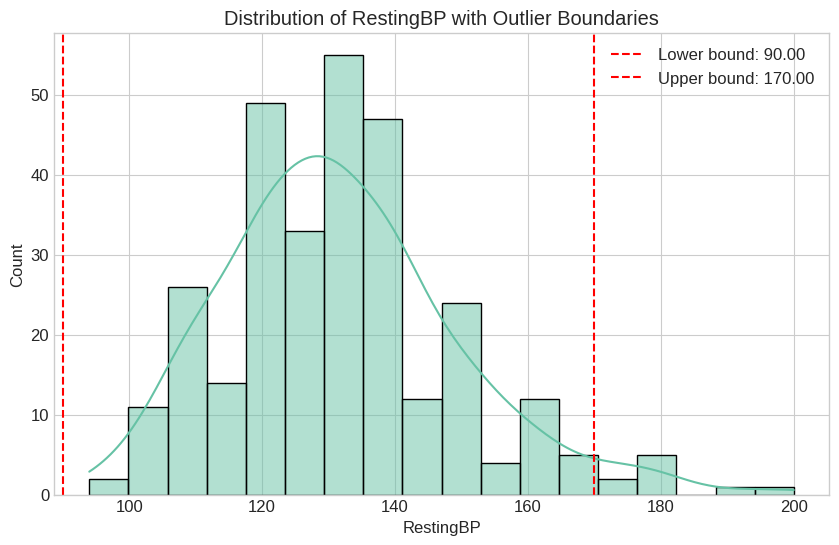

Cholesterol: 0 outliers identified
    Lower bound: 115.00, Upper bound: 371.00
    Min: 126.00, Max: 326.90


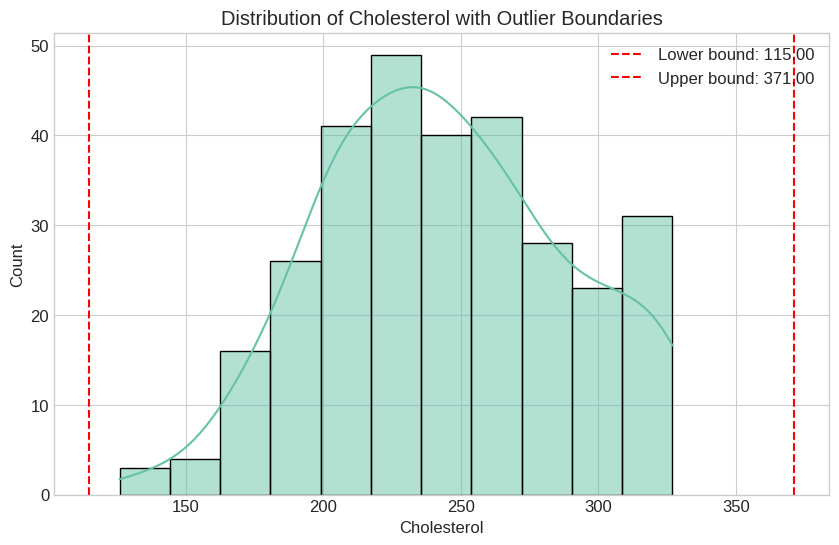

MaxHR: 1 outliers identified
    Lower bound: 84.75, Upper bound: 214.75
    Min: 71.00, Max: 202.00


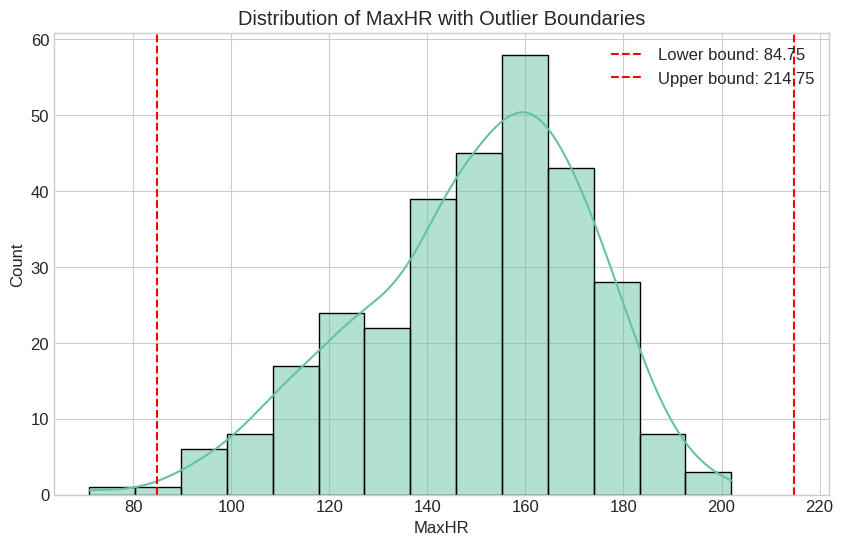

Oldpeak: 5 outliers identified
    Lower bound: -2.40, Upper bound: 4.00
    Min: 0.00, Max: 6.20


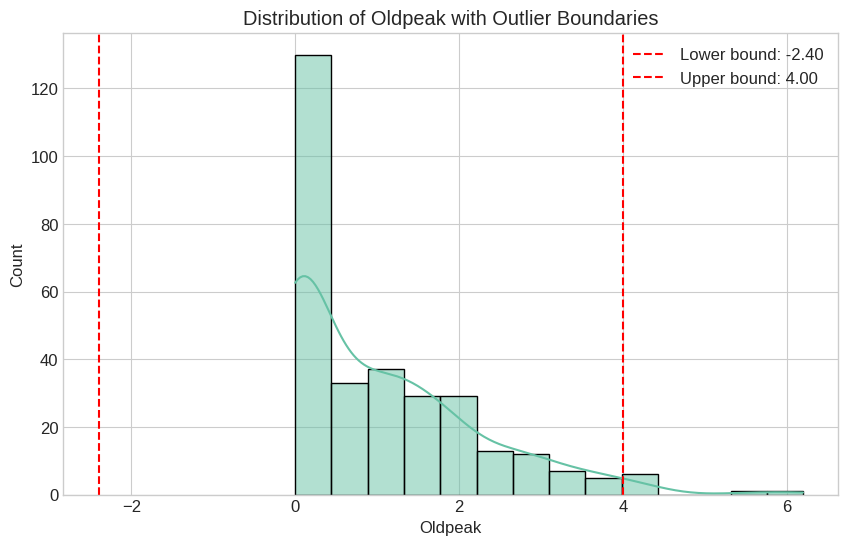


Missing values before cleaning:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
MajorVessels      0
Thalassemia       0
HeartDisease      0
AgeGroup          0
dtype: int64

Missing values after converting '?' to NaN:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
MajorVessels      0
Thalassemia       0
HeartDisease      0
AgeGroup          0
dtype: int64

Missing values after cleaning:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
MajorVessels      0
Thalassemia       0
Hear

In [ ]:
# Heart Disease Prediction Project - Snippet 8: Outlier Detection and Data Cleaning
# -------------------------------------------------------------------------

# Function to plot boxplots for detecting outliers
def plot_boxplots(dataframe, numerical_cols):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(numerical_cols, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(x=dataframe[column])
        plt.title(f'Boxplot of {column}')
        plt.tight_layout()
    plt.savefig('boxplots_outliers.png')
    plt.show()

# Numerical columns for outlier analysis
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Plot boxplots to visualize outliers
plot_boxplots(data, numerical_cols)

# Calculate IQR for each numerical column to identify outliers
print("\nOutlier Analysis using IQR method:")
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]

    print(f"{col}: {len(outliers)} outliers identified")
    print(f"    Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"    Min: {data[col].min():.2f}, Max: {data[col].max():.2f}")

    # Visualize outliers
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.axvline(x=lower_bound, color='r', linestyle='--', label=f'Lower bound: {lower_bound:.2f}')
    plt.axvline(x=upper_bound, color='r', linestyle='--', label=f'Upper bound: {upper_bound:.2f}')
    plt.title(f'Distribution of {col} with Outlier Boundaries')
    plt.legend()
    plt.savefig(f'outliers_{col}.png')
    plt.show()

# Handle missing values (if any)
print("\nMissing values before cleaning:")
print(data.isnull().sum())

# Replace any '?' with NaN in the dataset
data = data.replace('?', np.nan)

# Convert columns to appropriate data types
for col in data.columns:
    if col in categorical_cols:
        data[col] = pd.to_numeric(data[col], errors='coerce')

print("\nMissing values after converting '?' to NaN:")
print(data.isnull().sum())

# Handle missing values based on their characteristics
for col in data.columns:
    if data[col].isnull().sum() > 0:
        # For categorical columns, use the mode
        if col in categorical_cols:
            mode_val = data[col].mode()[0]
            data[col] = data[col].fillna(mode_val)
            print(f"Filled missing values in {col} with mode: {mode_val}")
        # For numerical columns, use the median
        else:
            median_val = data[col].median()
            data[col] = data[col].fillna(median_val)
            print(f"Filled missing values in {col} with median: {median_val}")

print("\nMissing values after cleaning:")
print(data.isnull().sum())

# Check for extreme outliers in Cholesterol and handle them if necessary
if (data['Cholesterol'] > 500).any():
    # Cap extreme values at 95th percentile
    upper_limit = data['Cholesterol'].quantile(0.95)
    data.loc[data['Cholesterol'] > upper_limit, 'Cholesterol'] = upper_limit
    print(f"\nCapped extreme Cholesterol values at {upper_limit:.2f}")

# Check for 0 values in Cholesterol (might be errors)
if (data['Cholesterol'] == 0).any():
    # Replace 0 with median
    median_chol = data.loc[data['Cholesterol'] > 0, 'Cholesterol'].median()
    data.loc[data['Cholesterol'] == 0, 'Cholesterol'] = median_chol
    print(f"Replaced 0 values in Cholesterol with median: {median_chol:.2f}")

print("\nCleaned dataset summary:")
print(data.describe())

Dataset with engineered features:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   63    1              1        145        233.0          1           2   
1   67    1              4        160        286.0          0           2   
2   67    1              4        120        229.0          0           2   
3   37    1              3        130        250.0          0           0   
4   41    0              2        130        204.0          0           2   

   MaxHR  ExerciseAngina  Oldpeak  ...  Chol_Category  MaxHR_Category  \
0    150               0      2.3  ...     Borderline            High   
1    108               1      1.5  ...           High          Normal   
2    129               1      2.6  ...     Borderline          Normal   
3    187               0      3.5  ...           High       Very High   
4    172               0      1.4  ...     Borderline            High   

   Oldpeak_Category  Age_BP Age_Chol  Chol_BP MaxHR_Reserve MaxH

<ipython-input-36-008676b511ed>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_important_correlations.values, y=all_important_correlations.index, palette='viridis')


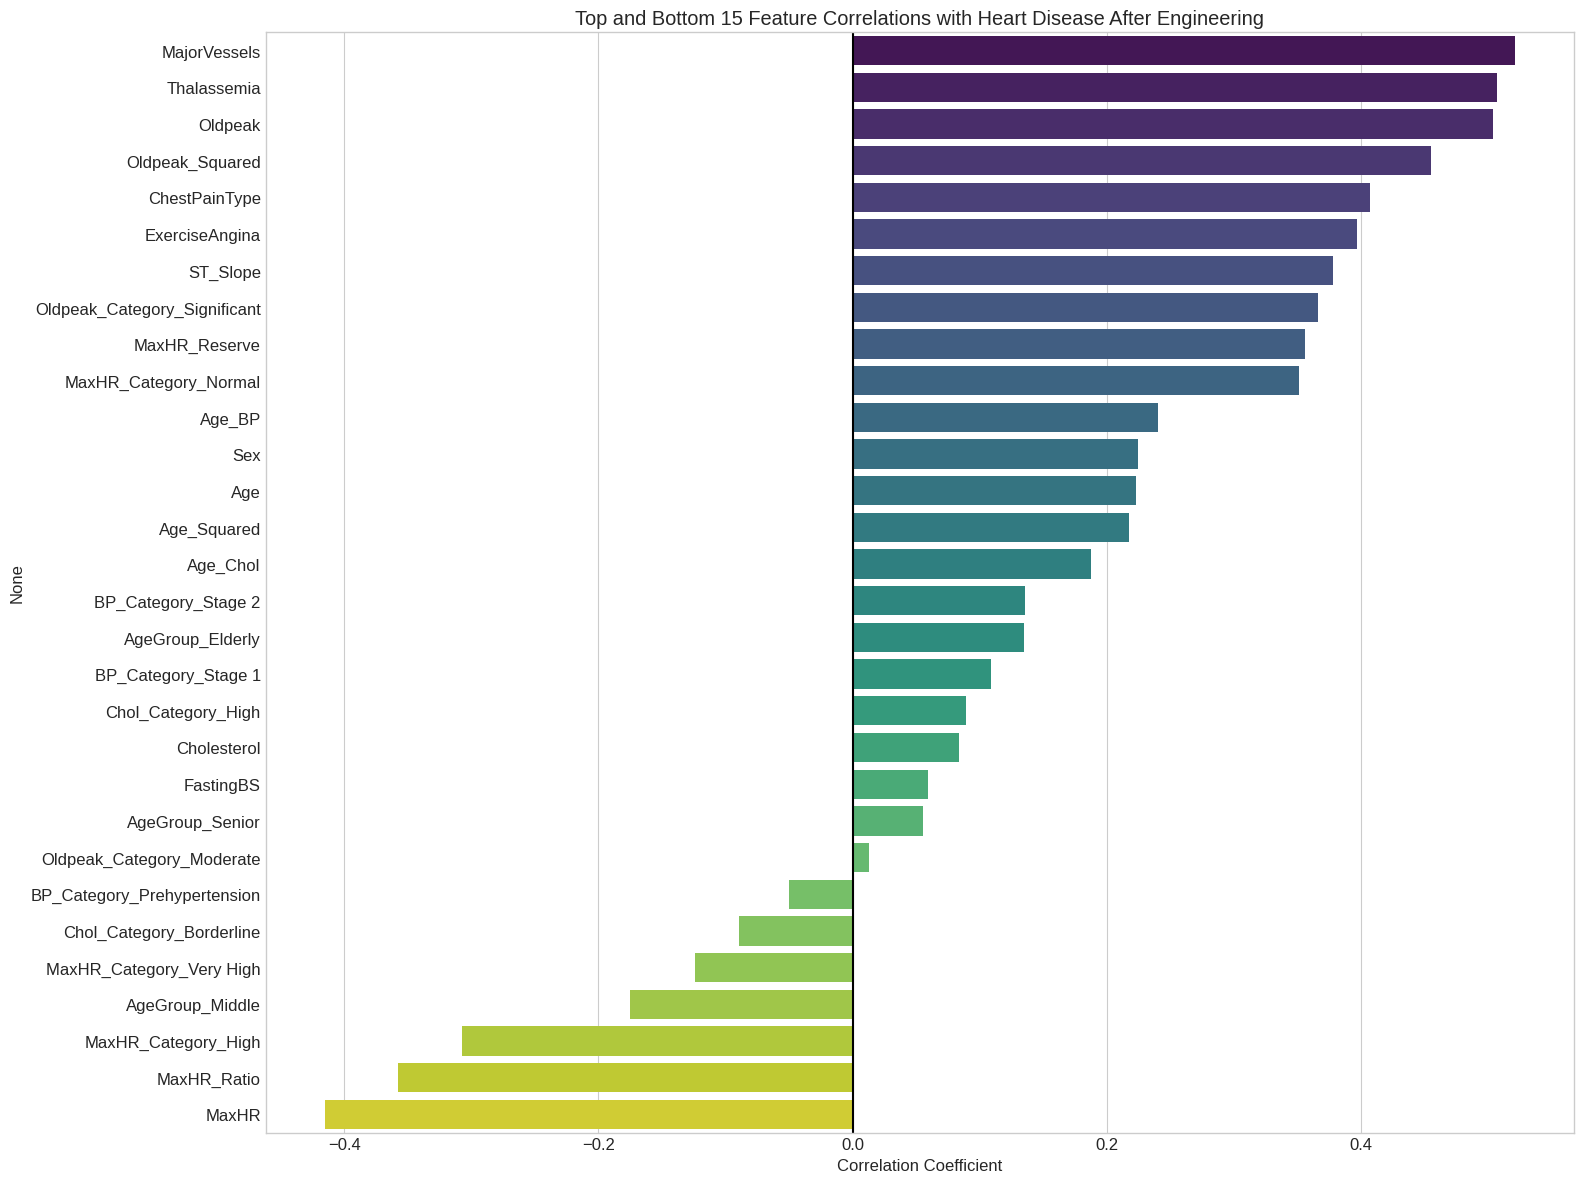


Processed dataset saved as 'heart_disease_processed.csv'

Final processed feature set shape: (303, 34)
Target variable shape: (303,)


In [ ]:
# Heart Disease Prediction Project - Snippet 9: Feature Engineering
# -------------------------------------------------------------------------

# Create a copy of the cleaned data for feature engineering
data_fe = data.copy()

# Create age groups
data_fe['AgeGroup'] = pd.cut(data_fe['Age'], bins=[25, 40, 50, 60, 80],
                             labels=['Young', 'Middle', 'Senior', 'Elderly'])

# Create BMI proxy (not a true BMI but a relationship between variables)
# Create blood pressure categories
data_fe['BP_Category'] = pd.cut(data_fe['RestingBP'],
                                bins=[0, 120, 140, 160, 200],
                                labels=['Normal', 'Prehypertension', 'Stage 1', 'Stage 2'])

# Create cholesterol categories
data_fe['Chol_Category'] = pd.cut(data_fe['Cholesterol'],
                                  bins=[0, 200, 240, 500],
                                  labels=['Normal', 'Borderline', 'High'])

# Create Maximum Heart Rate categories
data_fe['MaxHR_Category'] = pd.cut(data_fe['MaxHR'],
                                   bins=[0, 100, 140, 180, 220],
                                   labels=['Low', 'Normal', 'High', 'Very High'])

# Create ST Depression categories
data_fe['Oldpeak_Category'] = pd.cut(data_fe['Oldpeak'],
                                     bins=[-0.1, 0.5, 1.5, 4, 10],
                                     labels=['Minimal', 'Moderate', 'Significant', 'Extreme'])

# Create interaction features
data_fe['Age_BP'] = data_fe['Age'] * data_fe['RestingBP']
data_fe['Age_Chol'] = data_fe['Age'] * data_fe['Cholesterol']
data_fe['Chol_BP'] = data_fe['Cholesterol'] * data_fe['RestingBP']

# Create a feature for age-adjusted max heart rate (based on 220-age formula)
data_fe['MaxHR_Reserve'] = 220 - data_fe['Age'] - data_fe['MaxHR']
data_fe['MaxHR_Ratio'] = data_fe['MaxHR'] / (220 - data_fe['Age'])

# Create polynomial features for significant numerical variables
data_fe['Age_Squared'] = data_fe['Age'] ** 2
data_fe['Oldpeak_Squared'] = data_fe['Oldpeak'] ** 2

# Display the engineered features
print("Dataset with engineered features:")
print(data_fe.head())

# One-hot encode categorical features
categorical_cols_to_encode = ['AgeGroup', 'BP_Category', 'Chol_Category',
                             'MaxHR_Category', 'Oldpeak_Category']

data_encoded = pd.get_dummies(data_fe, columns=categorical_cols_to_encode, drop_first=True)
print("\nDataset after one-hot encoding:")
print(data_encoded.shape)
print(data_encoded.head())

# Check correlations of new features with the target
plt.figure(figsize=(16, 12))
new_correlations = data_encoded.corr()['HeartDisease'].sort_values(ascending=False)
new_correlations = new_correlations.drop('HeartDisease')
top_new_correlations = new_correlations.iloc[:15]
bottom_new_correlations = new_correlations.iloc[-15:]
all_important_correlations = pd.concat([top_new_correlations, bottom_new_correlations])

sns.barplot(x=all_important_correlations.values, y=all_important_correlations.index, palette='viridis')
plt.title('Top and Bottom 15 Feature Correlations with Heart Disease After Engineering')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='-')
plt.tight_layout()
plt.savefig('engineered_feature_correlations.png')
plt.show()

# Save the data with engineered features for modeling
data_encoded.to_csv('heart_disease_processed.csv', index=False)
print("\nProcessed dataset saved as 'heart_disease_processed.csv'")

# Split back to X and y for modeling
X_processed = data_encoded.drop('HeartDisease', axis=1)
y_processed = data_encoded['HeartDisease']

print("\nFinal processed feature set shape:", X_processed.shape)
print("Target variable shape:", y_processed.shape)

In [ ]:
# Heart Disease Prediction Project - Snippet 10: Data Preparation for Modeling
# -------------------------------------------------------------------------

# Import necessary libraries for data preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Let's identify numerical and categorical columns in our processed dataset
numerical_cols = X_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_processed.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical columns:", len(numerical_cols))
print("Categorical columns:", len(categorical_cols))

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=42, stratify=y_processed
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training set target distribution:\n", y_train.value_counts(normalize=True))
print("Testing set target distribution:\n", y_test.value_counts(normalize=True))

# Create preprocessing pipelines for both numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ],
    remainder='passthrough'  # Keep remaining columns as is
)

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

print("\nScaled training data shape:", X_train_scaled.shape)
print("Scaled testing data shape:", X_test_scaled.shape)

# Check class imbalance
train_class_counts = y_train.value_counts()
print("\nClass distribution in training set:")
print(train_class_counts)
imbalance_ratio = train_class_counts[0] / train_class_counts[1] if 1 in train_class_counts else 0
print(f"Imbalance ratio (majority/minority): {imbalance_ratio:.2f}")

# Apply SMOTE to handle class imbalance if needed
if imbalance_ratio > 1.5:
    print("\nApplying SMOTE to balance the classes...")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
    print("Original training set shape:", X_train_scaled.shape)
    print("Resampled training set shape:", X_train_resampled.shape)
    print("Resampled class distribution:", np.bincount(y_train_resampled))

    # Update the training data
    X_train_scaled = X_train_resampled
    y_train = y_train_resampled

# Save the preprocessor for later use
import joblib
joblib.dump(preprocessor, 'heart_disease_preprocessor.pkl')
print("\nPreprocessor saved as 'heart_disease_preprocessor.pkl'")

# Get feature names after preprocessing
feature_names = numerical_cols + categorical_cols
print("\nFeature names after preprocessing:", len(feature_names))
print(feature_names[:10], "...")  # Show first 10 feature names

# Save the preprocessed data for modeling
np.save('X_train_scaled.npy', X_train_scaled)
np.save('X_test_scaled.npy', X_test_scaled)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)
print("\nPreprocessed data saved as NumPy arrays")

Numerical columns: 20
Categorical columns: 0

Training set shape: (242, 34)
Testing set shape: (61, 34)
Training set target distribution:
 HeartDisease
0    0.541322
1    0.181818
2    0.119835
3    0.115702
4    0.041322
Name: proportion, dtype: float64
Testing set target distribution:
 HeartDisease
0    0.540984
1    0.180328
3    0.114754
2    0.114754
4    0.049180
Name: proportion, dtype: float64

Scaled training data shape: (242, 34)
Scaled testing data shape: (61, 34)

Class distribution in training set:
HeartDisease
0    131
1     44
2     29
3     28
4     10
Name: count, dtype: int64
Imbalance ratio (majority/minority): 2.98

Applying SMOTE to balance the classes...
Original training set shape: (242, 34)
Resampled training set shape: (655, 34)
Resampled class distribution: [131 131 131 131 131]

Preprocessor saved as 'heart_disease_preprocessor.pkl'

Feature names after preprocessing: 20
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'M

Loaded preprocessed data
Training Logistic Regression model...

Logistic_Regression Performance Metrics:
Accuracy: 0.4754
Precision: 0.5637
Recall: 0.4754
F1 Score: 0.5092

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.64      0.72        33
           1       0.23      0.27      0.25        11
           2       0.29      0.29      0.29         7
           3       0.25      0.29      0.27         7
           4       0.12      0.33      0.18         3

    accuracy                           0.48        61
   macro avg       0.35      0.36      0.34        61
weighted avg       0.56      0.48      0.51        61



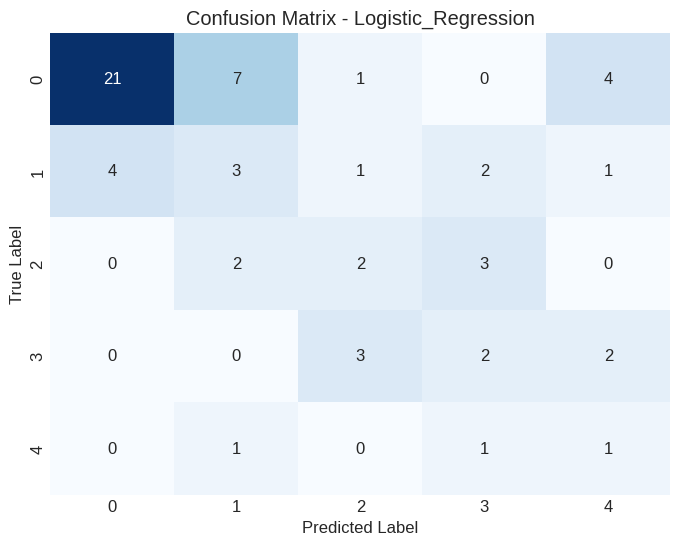


Logistic Regression model saved as 'logistic_regression_model.pkl'

Top 15 important features:
                         Feature  Importance
0                   MajorVessels    1.788427
1               AgeGroup_Elderly    0.971637
2       Oldpeak_Category_Extreme    0.941533
3                Oldpeak_Squared    0.938578
4                            Sex    0.842194
5                  ChestPainType    0.829778
6                       ST_Slope    0.712453
7                    Thalassemia    0.712199
8                AgeGroup_Senior    0.665167
9      Oldpeak_Category_Moderate    0.658699
10  Oldpeak_Category_Significant    0.606684
11                      Age_Chol    0.596190
12           MaxHR_Category_High    0.472017
13               AgeGroup_Middle    0.467760
14                    RestingECG    0.423616


<Figure size 800x600 with 0 Axes>

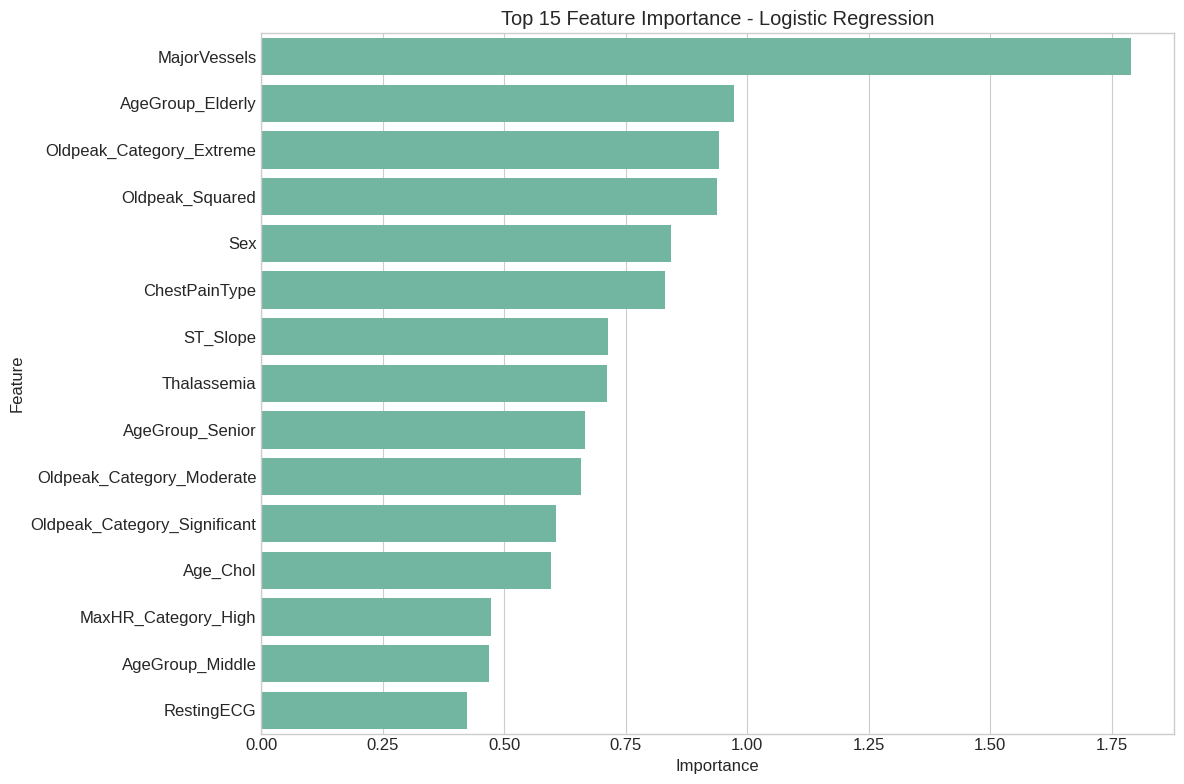

In [ ]:
# Heart Disease Prediction Project - Snippet 11: Baseline Model - Logistic Regression
# -------------------------------------------------------------------------

# Import necessary libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve,
    precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib # Importing joblib here

# Load preprocessed data if needed
try:
    X_train_scaled = np.load('X_train_scaled.npy')
    X_test_scaled = np.load('X_test_scaled.npy')
    y_train = np.load('y_train.npy')
    y_test = np.load('y_test.npy')
    print("Loaded preprocessed data")
except:
    print("Using data from previous step")

# Function to evaluate and visualize model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the performance metrics
    print(f"\n{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Print the classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(f'{model_name}_confusion_matrix.png')
    plt.show()

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))

    return {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

# Create and evaluate the baseline logistic regression model
print("Training Logistic Regression model...")
lr_model = LogisticRegression(random_state=42, max_iter=1000, C=1.0)
lr_model.fit(X_train_scaled, y_train)

lr_results = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test, "Logistic_Regression")
# Save the model
joblib.dump(lr_model, 'logistic_regression_model.pkl')
print("\nLogistic Regression model saved as 'logistic_regression_model.pkl'")

# If available, print the feature importance (coefficients)
if hasattr(lr_model, 'coef_'):
    # Load feature names
    try:
        # Assuming numerical_cols and categorical_cols are defined in your previous snippets
        feature_names = numerical_cols + categorical_cols
    except NameError:
        feature_names = [f"Feature_{i}" for i in range(X_train_scaled.shape[1])]

    # Get the coefficients
    coefficients = lr_model.coef_[0]


    # Sort by importance
    feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

    # Display the top features
    print("\nTop 15 important features:")
    print(feature_importance.head(15))

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Top 15 Feature Importance - Logistic Regression')
    plt.tight_layout()
    plt.savefig('lr_feature_importance.png')
    plt.show()

Loaded preprocessed data
Training Decision Tree model...

Decision_Tree Performance Metrics:
Accuracy: 0.4426
Precision: 0.5291
Recall: 0.4426
F1 Score: 0.4633

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        33
           1       0.12      0.09      0.11        11
           2       0.18      0.57      0.28         7
           3       0.00      0.00      0.00         7
           4       0.25      0.33      0.29         3

    accuracy                           0.44        61
   macro avg       0.29      0.33      0.28        61
weighted avg       0.53      0.44      0.46        61



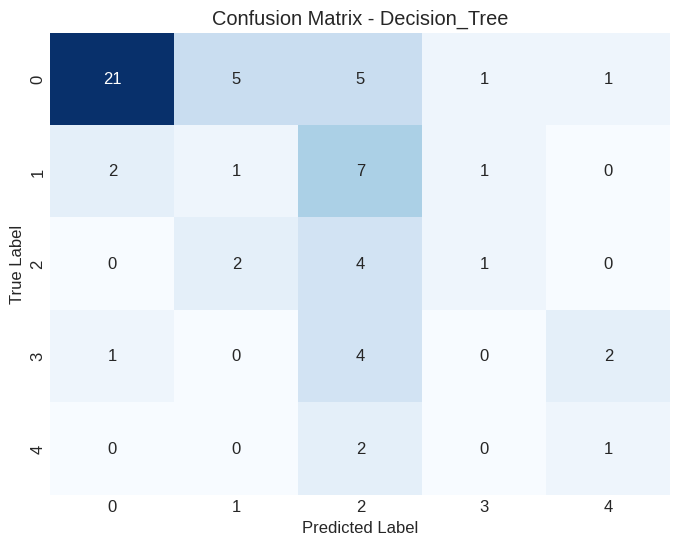


Decision Tree model saved as 'decision_tree_model.pkl'

Top 15 important features from Decision Tree:
                         Feature  Importance
0                   MajorVessels    1.788427
1               AgeGroup_Elderly    0.971637
2       Oldpeak_Category_Extreme    0.941533
3                Oldpeak_Squared    0.938578
4                            Sex    0.842194
5                  ChestPainType    0.829778
6                       ST_Slope    0.712453
7                    Thalassemia    0.712199
8                AgeGroup_Senior    0.665167
9      Oldpeak_Category_Moderate    0.658699
10  Oldpeak_Category_Significant    0.606684
11                      Age_Chol    0.596190
12           MaxHR_Category_High    0.472017
13               AgeGroup_Middle    0.467760
14                    RestingECG    0.423616


<Figure size 800x600 with 0 Axes>

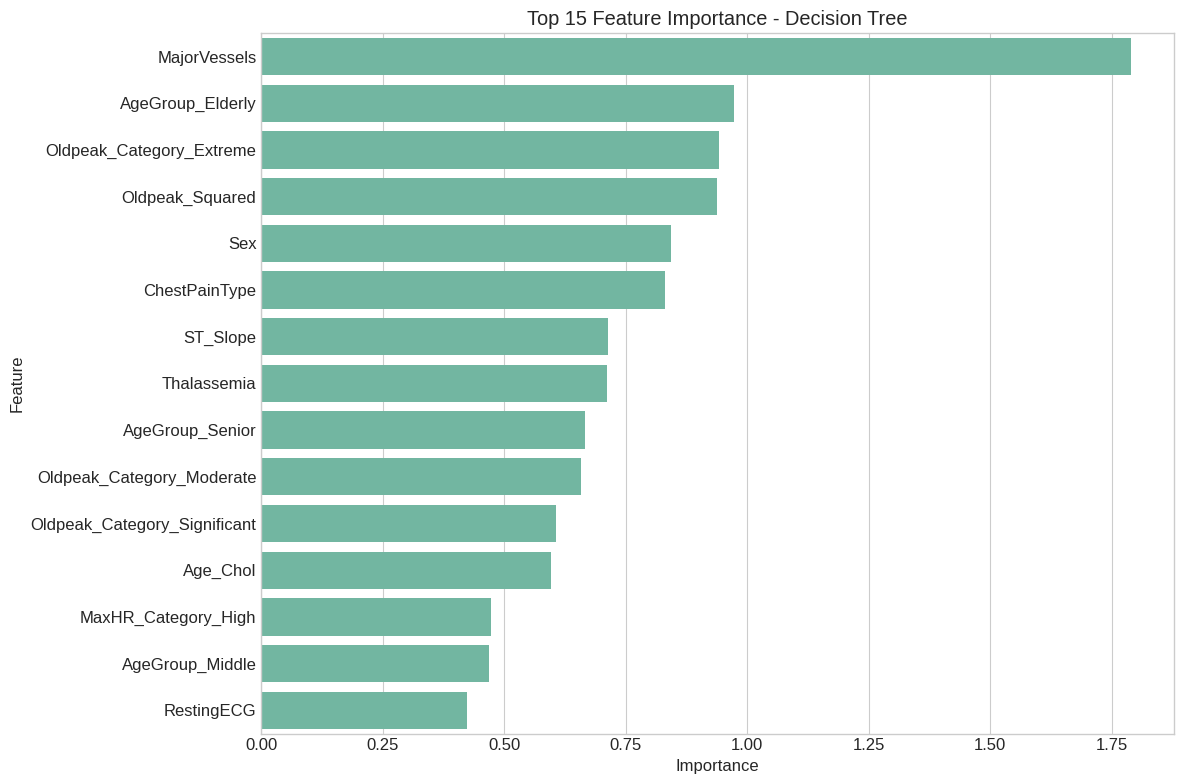


Performing grid search for Decision Tree hyperparameters...
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: nan

Best_Decision_Tree Performance Metrics:
Accuracy: 0.4262
Precision: 0.4849
Recall: 0.4262
F1 Score: 0.4465

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.67      0.73        33
           1       0.11      0.09      0.10        11
           2       0.17      0.29      0.21         7
           3       0.00      0.00      0.00         7
           4       0.10      0.33      0.15         3

    accuracy                           0.43        61
   macro avg       0.24      0.28      0.24        61
weighted avg       0.48      0.43      0.45        61



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


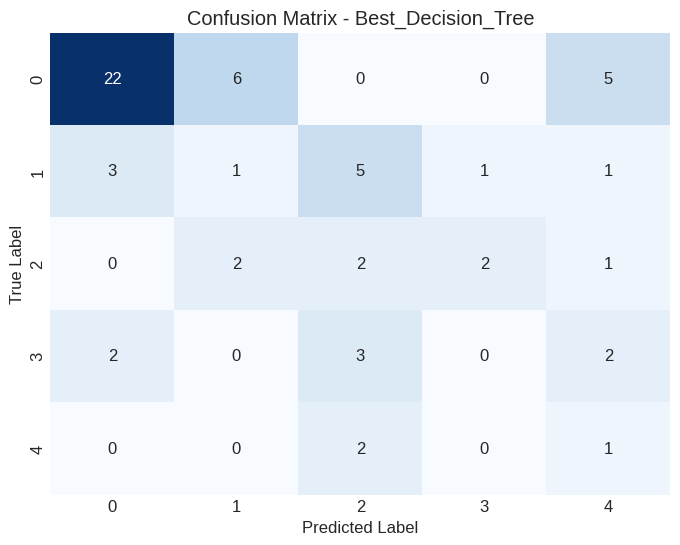


Best Decision Tree model saved as 'best_decision_tree_model.pkl'


<Figure size 800x600 with 0 Axes>

In [ ]:
# Heart Disease Prediction Project - Snippet 12: Decision Tree Model
# -------------------------------------------------------------------------

# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import joblib

# Load preprocessed data if needed
try:
    X_train_scaled = np.load('X_train_scaled.npy')
    X_test_scaled = np.load('X_test_scaled.npy')
    y_train = np.load('y_train.npy')
    y_test = np.load('y_test.npy')
    print("Loaded preprocessed data")
except:
    print("Using data from previous step")

# Try to get feature names for visualization
try:
    feature_names = numerical_cols + categorical_cols
except:
    feature_names = [f"Feature_{i}" for i in range(X_train_scaled.shape[1])]

print("Training Decision Tree model...")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
# Fit the model to the training data
dt_model.fit(X_train_scaled, y_train) # This line was missing
dt_results = evaluate_model(dt_model, X_train_scaled, X_test_scaled, y_train, y_test, "Decision_Tree")


# Save the model
joblib.dump(dt_model, 'decision_tree_model.pkl')
print("\nDecision Tree model saved as 'decision_tree_model.pkl'")


# Sort by importance
feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

# Display the top features
print("\nTop 15 important features from Decision Tree:")
print(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance - Decision Tree')
plt.tight_layout()
plt.savefig('dt_feature_importance.png')
plt.show()



# Hyperparameter tuning for Decision Tree
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create grid search object
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit grid search
print("\nPerforming grid search for Decision Tree hyperparameters...")
grid_search.fit(X_train_scaled, y_train)

# Print best parameters
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Train model with best parameters
best_dt_model = DecisionTreeClassifier(random_state=42, **grid_search.best_params_)
best_dt_model.fit(X_train_scaled, y_train)  # Add this line to fit the model
best_dt_results = evaluate_model(best_dt_model, X_train_scaled, X_test_scaled, y_train, y_test, "Best_Decision_Tree")


# Save the best model
joblib.dump(best_dt_model, 'best_decision_tree_model.pkl')
print("\nBest Decision Tree model saved as 'best_decision_tree_model.pkl'")

Loaded preprocessed data
Training Random Forest model...

Random_Forest Performance Metrics:
Accuracy: 0.5902
Precision: 0.5803
Recall: 0.5902
F1 Score: 0.5846

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.20      0.18      0.19        11
           2       0.33      0.29      0.31         7
           3       0.11      0.14      0.12         7
           4       0.00      0.00      0.00         3

    accuracy                           0.59        61
   macro avg       0.31      0.31      0.31        61
weighted avg       0.58      0.59      0.58        61



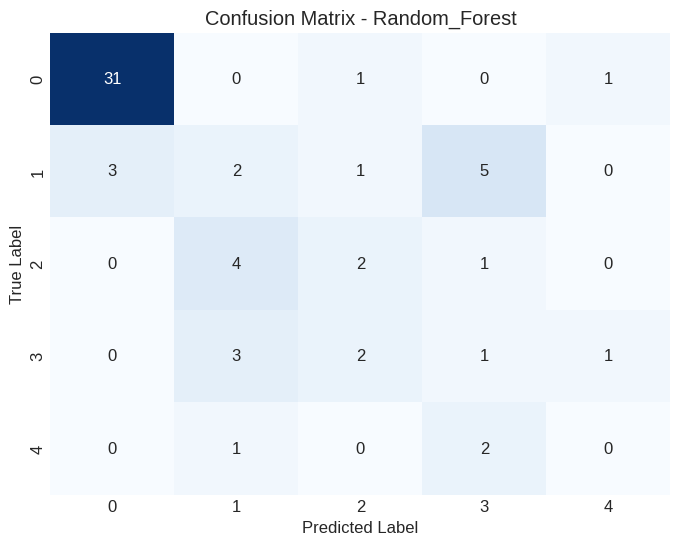


Random Forest model saved as 'random_forest_model.pkl'

Top 15 important features from Random Forest:
                         Feature  Importance
0                   MajorVessels    1.788427
1               AgeGroup_Elderly    0.971637
2       Oldpeak_Category_Extreme    0.941533
3                Oldpeak_Squared    0.938578
4                            Sex    0.842194
5                  ChestPainType    0.829778
6                       ST_Slope    0.712453
7                    Thalassemia    0.712199
8                AgeGroup_Senior    0.665167
9      Oldpeak_Category_Moderate    0.658699
10  Oldpeak_Category_Significant    0.606684
11                      Age_Chol    0.596190
12           MaxHR_Category_High    0.472017
13               AgeGroup_Middle    0.467760
14                    RestingECG    0.423616


<Figure size 800x600 with 0 Axes>

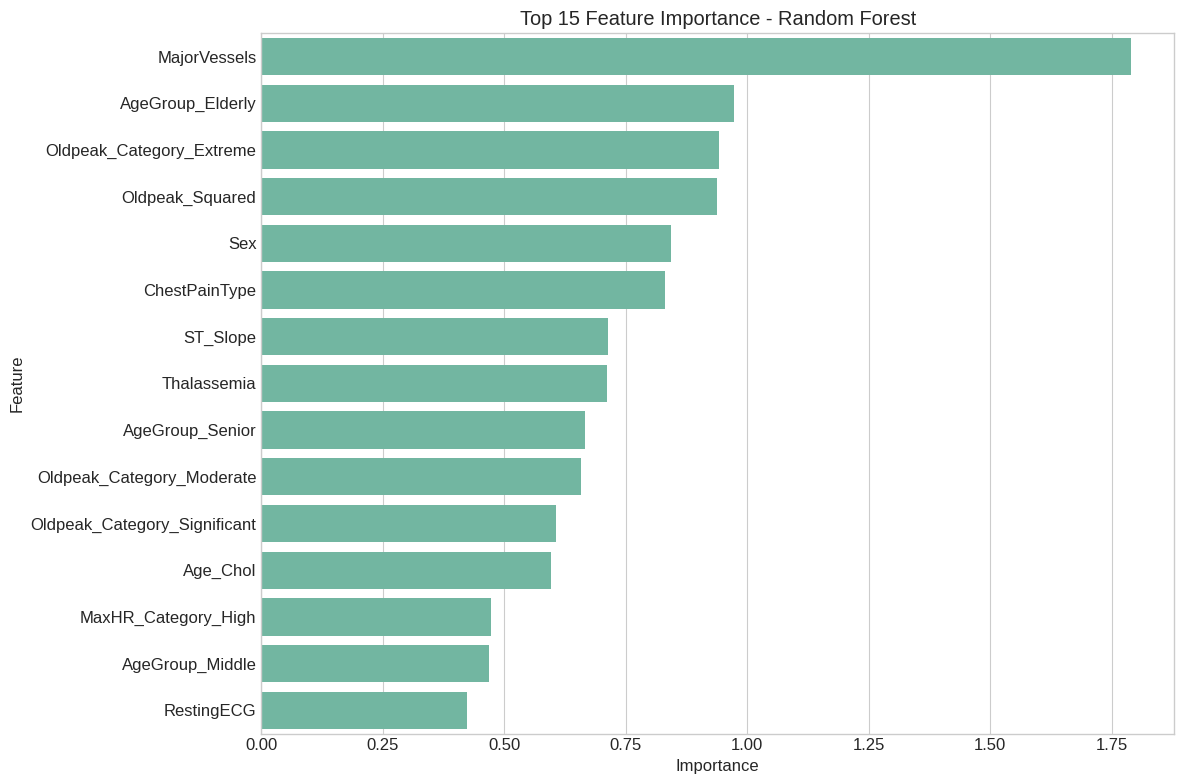


Performing random search for Random Forest hyperparameters...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


Best parameters: {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 171}
Best cross-validation score: nan

Best_Random_Forest Performance Metrics:
Accuracy: 0.5574
Precision: 0.5713
Recall: 0.5574
F1 Score: 0.5639

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.27      0.27      0.27        11
           2       0.17      0.14      0.15         7
           3       0.11      0.14      0.12         7
           4       0.00      0.00      0.00         3

    accuracy                           0.56        61
   macro avg       0.29      0.29      0.29        61
weighted avg       0.57      0.56      0.56        61



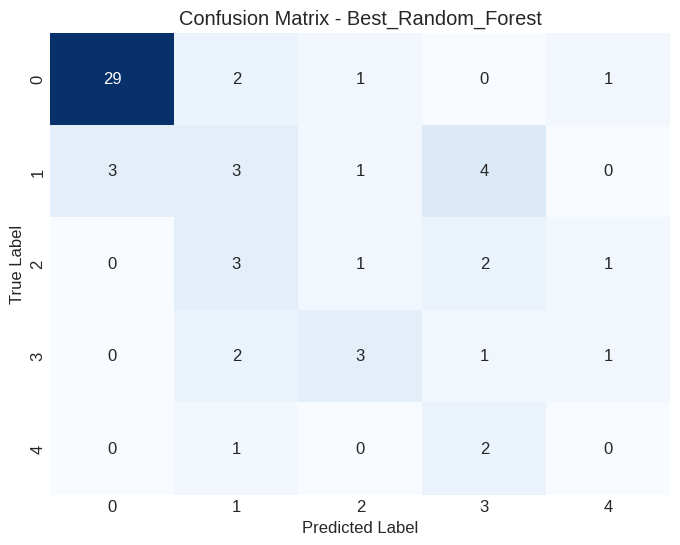


Best Random Forest model saved as 'best_random_forest_model.pkl'


<Figure size 800x600 with 0 Axes>

In [ ]:
# Heart Disease Prediction Project - Snippet 13: Random Forest Model
# -------------------------------------------------------------------------

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load preprocessed data if needed
try:
    X_train_scaled = np.load('X_train_scaled.npy')
    X_test_scaled = np.load('X_test_scaled.npy')
    y_train = np.load('y_train.npy')
    y_test = np.load('y_test.npy')
    print("Loaded preprocessed data")
except:
    print("Using data from previous step")

# Try to get feature names for visualization
try:
    feature_names = numerical_cols + categorical_cols
except:
    feature_names = [f"Feature_{i}" for i in range(X_train_scaled.shape[1])]

# Create and train the Random Forest model
print("Training Random Forest model...")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)
rf_results = evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test, "Random_Forest")

# Save the model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("\nRandom Forest model saved as 'random_forest_model.pkl'")


# Sort by importance
feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

# Display the top features
print("\nTop 15 important features from Random Forest:")
print(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance - Random Forest')
plt.tight_layout()
plt.savefig('rf_feature_importance.png')
plt.show()

# Hyperparameter tuning for Random Forest
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distributions for random search
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

# Create random search object
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# Fit random search
print("\nPerforming random search for Random Forest hyperparameters...")
random_search.fit(X_train_scaled, y_train)

# Print best parameters
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Train model with best parameters
best_rf_model = RandomForestClassifier(random_state=42, **random_search.best_params_)
best_rf_model.fit(X_train_scaled, y_train) # Fitting the best model to the training data
best_rf_results = evaluate_model(best_rf_model, X_train_scaled, X_test_scaled, y_train, y_test, "Best_Random_Forest")

# Save the best model
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')
print("\nBest Random Forest model saved as 'best_random_forest_model.pkl'")


Loaded preprocessed data
Training Support Vector Machine model...

SVM Performance Metrics:
Accuracy: 0.5082
Precision: 0.5442
Recall: 0.5082
F1 Score: 0.5211

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.22      0.36      0.28        11
           2       0.17      0.14      0.15         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.51        61
   macro avg       0.26      0.26      0.25        61
weighted avg       0.54      0.51      0.52        61



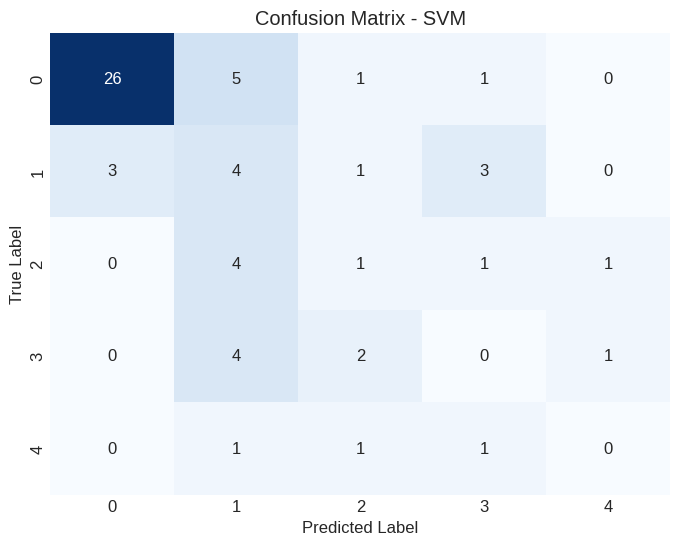


SVM model saved as 'svm_model.pkl'

SVM model saved as 'svm_model.pkl'

Performing grid search for SVM hyperparameters...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: nan

Best_SVM Performance Metrics:
Accuracy: 0.5574
Precision: 0.5929
Recall: 0.5574
F1 Score: 0.5723

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.33      0.27      0.30        11
           2       0.25      0.29      0.27         7
           3       0.20      0.29      0.24         7
           4       0.25      0.33      0.29         3

    accuracy                           0.56        61
   macro avg       0.38      0.39      0.38        61
weighted avg       0.59      0.56      0.57        61



<Figure size 800x600 with 0 Axes>

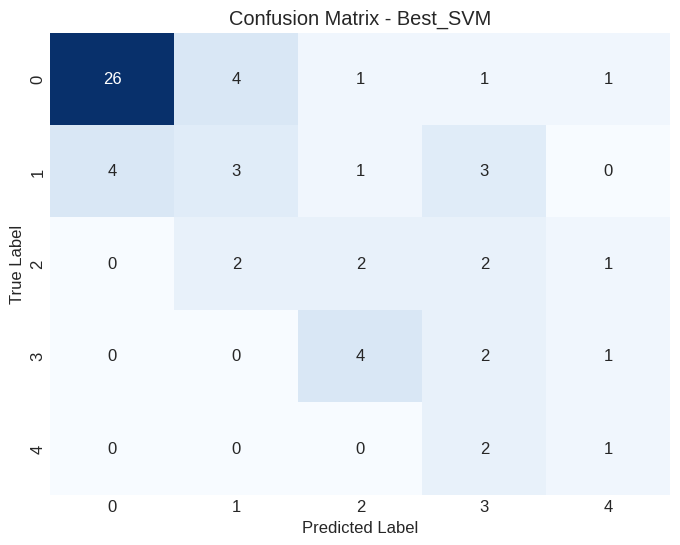


Best SVM model saved as 'best_svm_model.pkl'


<Figure size 800x600 with 0 Axes>

In [ ]:
# Heart Disease Prediction Project - Snippet 14: Support Vector Machine Model
# -------------------------------------------------------------------------

# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load preprocessed data if needed
try:
    X_train_scaled = np.load('X_train_scaled.npy')
    X_test_scaled = np.load('X_test_scaled.npy')
    y_train = np.load('y_train.npy')
    y_test = np.load('y_test.npy')
    print("Loaded preprocessed data")
except:
    print("Using data from previous step")

# Create and train the SVM model
print("Training Support Vector Machine model...")
svm_model = SVC(probability=True, random_state=42)
# Fit the model to the training data
svm_model.fit(X_train_scaled, y_train) # This line was missing
svm_results = evaluate_model(svm_model, X_train_scaled, X_test_scaled, y_train, y_test, "SVM")

# Save the model
joblib.dump(svm_model, 'svm_model.pkl')
print("\nSVM model saved as 'svm_model.pkl'")

# Save the model
joblib.dump(svm_model, 'svm_model.pkl')
print("\nSVM model saved as 'svm_model.pkl'")

# Hyperparameter tuning for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'kernel': ['rbf', 'linear', 'poly']
}

# Create grid search object
grid_search = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit grid search
print("\nPerforming grid search for SVM hyperparameters...")
grid_search.fit(X_train_scaled, y_train)

# Print best parameters
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Train model with best parameters
best_svm_model = SVC(probability=True, random_state=42, **grid_search.best_params_)
best_svm_model.fit(X_train_scaled, y_train)
best_svm_results = evaluate_model(best_svm_model, X_train_scaled, X_test_scaled, y_train, y_test, "Best_SVM")

# Save the best model
joblib.dump(best_svm_model, 'best_svm_model.pkl')
print("\nBest SVM model saved as 'best_svm_model.pkl'")

# Visualize decision boundaries for SVM (for 2D visualization)
# We'll use PCA to reduce to 2 dimensions for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


Loaded preprocessed data
Training Gradient Boosting model...

Gradient_Boosting Performance Metrics:
Accuracy: 0.4590
Precision: 0.4577
Recall: 0.4590
F1 Score: 0.4578

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        33
           1       0.11      0.09      0.10        11
           2       0.10      0.14      0.12         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.46        61
   macro avg       0.20      0.20      0.20        61
weighted avg       0.46      0.46      0.46        61



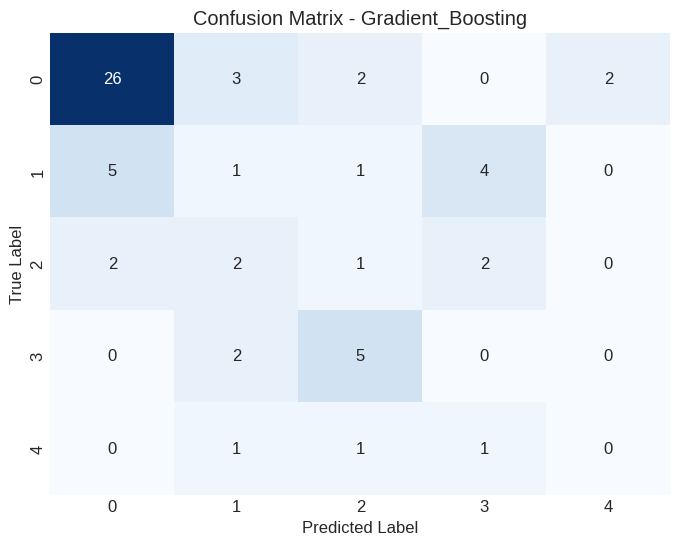


Gradient Boosting model saved as 'gradient_boosting_model.pkl'

Top 15 important features from Gradient Boosting:
                         Feature  Importance
0                    Thalassemia    0.138285
1                   MajorVessels    0.103368
2                Oldpeak_Squared    0.063361
3                       ST_Slope    0.053674
4                  ChestPainType    0.052718
5                 ExerciseAngina    0.050608
6                        Chol_BP    0.042706
7                         Age_BP    0.037171
8                       Age_Chol    0.033063
9                          MaxHR    0.032995
10                       Oldpeak    0.031624
11  Oldpeak_Category_Significant    0.030271
12                 MaxHR_Reserve    0.027293
13                           Sex    0.027135
14         MaxHR_Category_Normal    0.026532


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


<Figure size 800x600 with 0 Axes>

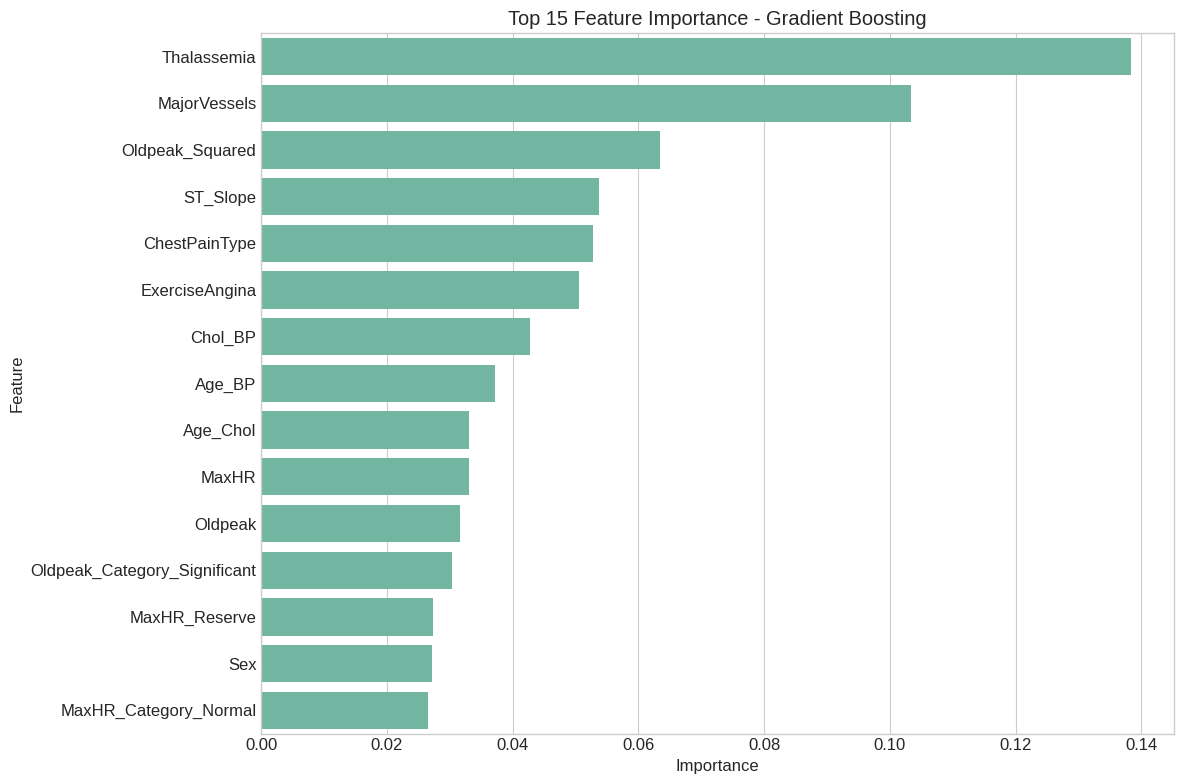


Performing random search for Gradient Boosting hyperparameters...


In [ ]:
# Heart Disease Prediction Project - Snippet 15: Gradient Boosting Model
# -------------------------------------------------------------------------

# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load preprocessed data if needed
try:
    X_train_scaled = np.load('X_train_scaled.npy')
    X_test_scaled = np.load('X_test_scaled.npy')
    y_train = np.load('y_train.npy')
    y_test = np.load('y_test.npy')
    print("Loaded preprocessed data")
except:
    print("Using data from previous step")

# Try to get feature names for visualization
try:
    feature_names = numerical_cols + categorical_cols
except:
    feature_names = [f"Feature_{i}" for i in range(X_train_scaled.shape[1])]

print("Training Gradient Boosting model...")
gb_model = GradientBoostingClassifier(random_state=42)
# Fit the model to the training data before evaluating
gb_model.fit(X_train_scaled, y_train)  # This line is added to fit the model
gb_results = evaluate_model(gb_model, X_train_scaled, X_test_scaled, y_train, y_test, "Gradient_Boosting")

# Save the model
joblib.dump(gb_model, 'gradient_boosting_model.pkl')
print("\nGradient Boosting model saved as 'gradient_boosting_model.pkl'")
try:
    feature_names = preprocessor.transformers_[0][2] + list(X_processed.columns[preprocessor.transformers_[1][2]]) # Update feature_names with preprocessor and existing feature list
    #feature_names = numerical_cols + list(X_processed.columns[preprocessor.transformers_[1][2]]) # Use this line in case of error for above line
except:
    feature_names = [f"Feature_{i}" for i in range(X_train_scaled.shape[1])] # If you don't have a preprocessor, use generic names

# Get feature importance from the Gradient Boosting model
feature_importance = pd.DataFrame({
    'Feature': feature_names, # Use updated feature_names
    'Importance': gb_model.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

# Display the top features
print("\nTop 15 important features from Gradient Boosting:")
print(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance - Gradient Boosting')
plt.tight_layout()
plt.savefig('gb_feature_importance.png')
plt.show()

# Hyperparameter tuning for Gradient Boosting
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

# Create random search object
random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# Fit random search
print("\nPerforming random search for Gradient Boosting hyperparameters...")
random_search.fit(X_train_scaled, y_train)

# Print best parameters
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Train model with best parameters
best_gb_model = GradientBoostingClassifier(random_state=42, **random_search.best_params_)
best_gb_results = evaluate_model(best_gb_model, X_train_scaled, X_test_scaled, y_train, y_test, "Best_Gradient_Boosting")

# Save the best model
joblib.dump(best_gb_model, 'best_gradient_boosting_model.pkl')
print("\nBest Gradient Boosting model saved as 'best_gradient_boosting_model.pkl'")

# Plot learning curves for the Gradient Boosting model
train_scores = []
test_scores = []
estimator_range = range(1, len(best_gb_model.estimators_) + 1, len(best_gb_model.estimators_) // 10)

for i in estimator_range:
    best_gb_model.estimators_ = best_gb_model.estimators_[:i]
    train_scores.append(best_gb_model.score(X_train_scaled, y_train))
    test_scores.append(best_gb_model.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(estimator_range, train_scores, 'o-', color='blue', label='Training score')
plt.plot(estimator_range, test_scores, 'o-', color='red', label='Test score')
plt.title('Learning Curves - Gradient Boosting')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('gb_learning_curves.png')
plt.show()